# #MLDL19 Projekt

## Clustering und Klassifikation dc_motor_data

Ausarbeitung von Caroline Kayser, Andreas Mangold, Daniel Eberhardt und Alexander Wittmann

#### *Inhaltsverzeichnis*
0. Daten und Bibliotheken laden
1. Data Exploration and Preparation
    - Daten betrachten
    - Deskriptive Statistik und Korrelationsmatrix
    - Bereinigung von NULL Values und Duplikaten
    - Visualisierung
2. Feature Selection / Feature Engineering
    - Aufteilung in Trainings- und Testset
    - Normalisierung
    - Outlier/Ausreißer entfernen
    - Principal Component Analysis (Dimensionality Reduction)
    - Chi²-Test (Feature Elimination)
3. Clustering Verfahren
    - KMeans Verfahren
    - Hierarchisches Clustern
4. Klassifikation
    - 1 Nearest Neighbor
    - k Nearest Neighbor
    - Naive Bayes Classifier
    - Desicion Tree
        - Desicion Tree
        - Random Forrest
    - Support Vector Machines
5. Artificial Neural Networks
6. Auswertung und Bewertung der Classifier und Ergebnisse
     

### 0. Bibliotheken und Daten laden

Zu Beginn des Projektes werden die wichtigsten Bibliotheken geladen, die benötigt werden, um die Daten zu laden und erste Schritte zu tätigen. Weitere Bibliotheken, die für einzele Aufgaben relevant sind, werden auch im weiteren Verlauf noch eingelesen.
Hierfür wird der Standard Python Data Science Stack verwendet.

Zudem wird bereits ein DataFrame initialisiert, welches später die Ergebnisse der Modelle beinhaltet.

In [1]:
#Import of libs
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
#Import der Daten in ein Pandas Dataframe
# Dieser baut auf Numpy Arrays auf und wird von den 
# gängigen ML Bibliotheken unterstützt.

#Laden des Datensatzes aus einem csv-File in ein Pandas Dataframe

print('Load Dataset into Pandas Dataframe....')
try :
    df = pd.read_csv('dc_motor_data.csv', delimiter=',')
    print('Dataset was succesfully loaded in "df"')
except:
    print('Failure durring loading phase!')
   

Load Dataset into Pandas Dataframe....
Dataset was succesfully loaded in "df"


#### Result vorbereiten (für die Auswertung)

Hier wird ein DataFrame mit den später angegangenen Klassifikatoren als Index initialisiert.

In [3]:
# Initialisierung der Results
results = pd.DataFrame(columns=[
    "Runtime Training",
    "Runtime Prediction",
    "Score Trainings-Set",
    "Score Test-Set",
    "Runtime Training without Outliers",
    "Runtime Prediction without Outliers",
    "Score Trainings-Set without Outliers",
    "Score Test-Set without Outliers",
    "Runtime Training PCA Features",
    "Runtime Prediction PCA Features",
    "Score Trainings-Set PCA Features","Score Test-Set PCA Features",
    "Runtime Training KBest Features",
    "Runtime Prediction KBest Features",
    "Score Trainings-Set KBest Features","Score Test-Set KBest Features"],
    index= ["1-NN", "K-NN", "Bayes", "Decision Tree","Random Forrest", "SVM", "ANN"])

results

,Runtime Training,Runtime Prediction,Score Trainings-Set,Score Test-Set,Runtime Training without Outliers,Runtime Prediction without Outliers,Score Trainings-Set without Outliers,Score Test-Set without Outliers,Runtime Training PCA Features,Runtime Prediction PCA Features,Score Trainings-Set PCA Features,Score Test-Set PCA Features,Runtime Training KBest Features,Runtime Prediction KBest Features,Score Trainings-Set KBest Features,Score Test-Set KBest Features
1-NN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
K-NN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bayes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Decision Tree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Random Forrest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SVM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ANN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 1 Data Exploration und Preparation

#### 1.1 Daten betrachten

*Know Your Data*

Bevor Machine Learning Algorithmen auf die Daten angewandt werden können, ist es wichtig die Daten zu verstehen. Hierfür eignen sich u.a. Methoden der deskriptiven Statistik, da dadurch bereits Auffälligkeiten betrachtet werden können. Diese Auffälligkeiten und Ergebnisse sind wichtig, um später die Ergebnisse besser zu verstehen und die Daten entsprechend aufbereiten zu können.

In [4]:
#Datensatz mit der function head() ansehen. Gibt die ersten 5 feature vectors zurück und die Feature-Namen
print('Return the first 5 Feature Vectors')
df.head()

Return the first 5 Feature Vectors


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V40,V41,V42,V43,V44,V45,V46,V47,V48,class
0,2.913200e-06,-5.247700e-06,0.000003,-6.056100e-06,2.778900e-06,-3.752400e-06,0.030804,0.030810,0.030806,-0.033520,...,-0.59314,7.6252,6.1690,-1.4967,-1.4967,-1.4967,-1.5005,-1.5005,-1.5005,1
1,-9.584900e-07,5.214300e-08,-0.000047,6.453700e-07,-2.304100e-06,5.499900e-05,0.031154,0.031154,0.031201,-0.032789,...,-0.61124,5.8337,18.6970,-1.4956,-1.4956,-1.4956,-1.4973,-1.4972,-1.4973,1
2,-2.566600e-06,-1.679500e-07,0.000015,-1.598400e-06,8.709200e-07,1.496100e-05,0.031071,0.031071,0.031056,-0.029695,...,-0.63618,12.8380,4.9079,-1.4990,-1.4990,-1.4990,-1.4968,-1.4968,-1.4968,1
3,2.825600e-06,6.067600e-06,0.000118,-4.347500e-06,1.492300e-06,-2.917100e-06,0.030947,0.030941,0.030823,-0.032171,...,-0.58170,2.0511,8.8939,-1.4963,-1.4963,-1.4963,-1.4943,-1.4943,-1.4943,1
4,-6.573800e-07,-3.951900e-07,0.000032,-5.296100e-06,-1.605800e-06,7.566000e-07,0.029416,0.029416,0.029385,-0.028420,...,-0.59578,5.3394,13.3550,-1.4984,-1.4984,-1.4984,-1.4970,-1.4970,-1.4970,1


In [5]:
#Ausgabe aller Features in einem Index Object
print('All available Features:')
df.columns

All available Features:


Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31',
       'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41',
       'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'class'],
      dtype='object')

In [6]:
#Größe und Struktur des Dataframes über shape erkunden
#Ausgabe der Anzahl von Feature Vectors und Features
shape = df.shape
print("The dataset contains {0} Features and {1} Feature Vectors".format(shape[1],shape[0]))

The dataset contains 49 Features and 29255 Feature Vectors


In [7]:
#Infos über das Data Frame auslesen. Vor allem Datentypen ermitteln
print("""
Standard Information about the dataset and the data types of the features.
""")
print(df.info())


Standard Information about the dataset and the data types of the features.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29255 entries, 0 to 29254
Data columns (total 49 columns):
V1       29255 non-null float64
V2       29255 non-null float64
V3       29255 non-null float64
V4       29255 non-null float64
V5       29255 non-null float64
V6       29255 non-null float64
V7       29255 non-null float64
V8       29255 non-null float64
V9       29255 non-null float64
V10      29255 non-null float64
V11      29255 non-null float64
V12      29255 non-null float64
V13      29255 non-null float64
V14      29255 non-null float64
V15      29255 non-null float64
V16      29255 non-null float64
V17      29255 non-null float64
V18      29255 non-null float64
V19      29255 non-null float64
V20      29255 non-null float64
V21      29255 non-null float64
V22      29255 non-null float64
V23      29255 non-null float64
V24      29255 non-null float64
V25      29255 non-null float64
V26      29255

#### 1.2 Deskriptive Statistik

Berechnung und Darstellung von diversen Statisitischen Messgrößen, um den Datensatz / die Features besser einschätzen zu können.
Die Ergebnisse werden auch in einer separaten Datei gesichert.

In [8]:
#Berechnung der Ranges für jedes Feature und den Mittelwert.
#Könnte Hinweis auf Outliers etc. geben
print("Ranges of Values in the Feature Vectors")
for feat in df.columns:
    print(feat,': values in range from {0} till {1}. Mean: {2}. Standard deviation {3}'.format(df[feat].min(),df[feat].max(),df[feat].mean(),df[feat].std()))

Ranges of Values in the Feature Vectors
V1 : values in range from -0.0085477 till 0.005783600000000001. Mean: -3.109736869290385e-06. Standard deviation 6.118180444424403e-05
V2 : values in range from -0.0054144 till 0.0045253. Mean: 1.4523883623975248e-06. Standard deviation 5.872839437949977e-05
V3 : values in range from -0.0060557 till 0.0033304000000000003. Mean: 1.1824358711533177e-06. Standard deviation 0.00022774107314962872
V4 : values in range from -0.012787 till 0.0014531. Mean: -1.6536181392541433e-06. Standard deviation 8.789335238475313e-05
V5 : values in range from -0.0083559 till 0.00082451. Mean: 1.2819713858109966e-06. Standard deviation 6.828195086704047e-05
V6 : values in range from -0.0097413 till 0.0027535999999999997. Mean: -9.390808433429867e-07. Standard deviation 0.00023335416458202513
V7 : values in range from -0.13063 till 0.06851499999999999. Mean: 0.0017744121312664475. Standard deviation 0.036424564868514225
V8 : values in range from -0.13055999999999998 t

In [9]:
print('Basic descriptive statistic:')
print(df.describe())

Basic descriptive statistic:
                 V1            V2            V3            V4            V5  \
count  29255.000000  2.925500e+04  2.925500e+04  29255.000000  2.925500e+04   
mean      -0.000003  1.452388e-06  1.182436e-06     -0.000002  1.281971e-06   
std        0.000061  5.872839e-05  2.277411e-04      0.000088  6.828195e-05   
min       -0.008548 -5.414400e-03 -6.055700e-03     -0.012787 -8.355900e-03   
25%       -0.000007 -1.450950e-05 -7.369750e-05     -0.000005 -1.476350e-05   
50%       -0.000003  8.100600e-07  7.743100e-07     -0.000001  9.111200e-07   
75%        0.000002  1.890750e-05  7.569250e-05      0.000004  1.934700e-05   
max        0.005784  4.525300e-03  3.330400e-03      0.001453  8.245100e-04   

                 V6            V7            V8            V9           V10  \
count  2.925500e+04  29255.000000  29255.000000  29255.000000  29255.000000   
mean  -9.390808e-07      0.001774      0.001773      0.001772     -0.012276   
std    2.333542e-04   

In [10]:
#Manuelle Berechnung von weiteren Messgrößen für jedes Feature
#Die Ergebnisse werden in einem csv File gespeichert und sind
#für weitere Zwecke wiederverwendbar.
#Datei einlesen
with open('dc_motor_data.csv') as input_file:
    line = input_file.readline()
    line = input_file.readline()
    list_data = [] 
    list_label = []
    while line:
        
        list_Datensatz = line.split(',')
        list_floats = []
        
        for i in list_Datensatz:
            i = float(i)
            list_floats.append(i)
        list_label.append(list_floats[48])
        
        del list_floats[48]
        list_data.append(list_floats)
        line = input_file.readline()
input_file.close()

#Liste der Datensätze umwandeln in ein Np Array   
list_data = np.asarray(list_data)

list_max = []
list_min = []
list_mean = []
list_median = []
list_std = []
str_max = "max;"
str_min = "min;"
str_mean = "mean;"
str_median = "median;"
str_std = "std;"

for i in range(48):
    list_max.append(max(list_data[:, i]))
    str_max = str_max + str("%1.11f"% max(list_data[:, i])) + ";"
    str_max = str_max.replace(".", ",")
    list_min.append(min(list_data[:, i]))
    str_min = str_min + str("%1.11f"% min(list_data[:, i])) + ";"
    str_min = str_min.replace(".", ",")
    list_mean.append(np.mean(list_data[:, i]))
    str_mean = str_mean + str("%1.11f"% np.mean(list_data[:, i])) + ";"
    str_mean = str_mean.replace(".", ",")
    list_median.append(np.median(list_data[:, i]))
    str_median = str_median + str("%1.11f"% np.median(list_data[:, i])) + ";"
    str_median = str_median.replace(".", ",")
    list_std.append(np.std(list_data[:, i]))
    str_std = str_std + str("%1.11f"% np.std(list_data[:, i])) + ";"
    str_std = str_std.replace(".", ",")

#String aus Listen(min, max, median, mean, std) aufbereiten

#Strings korekt ausgeben um Daten zu analysieren
with open('descriptive_stat_table.csv', "w") as ausgabe_file:
    str_max_all = str(max(list_max))
    str_max_all = str_max_all.replace(".", ",")
    str_min_all = str(min(list_min))
    str_min_all = str_min_all.replace(".", ",")
    ausgabe_file.write("Max_over_all;" + str_max_all + "\n")
    ausgabe_file.write("Min_over_all;" + str_min_all + "\n")
    ausgabe_file.write(str_max + "\n")
    ausgabe_file.write(str_min + "\n")
    ausgabe_file.write(str_mean + "\n")
    ausgabe_file.write(str_median + "\n")
    ausgabe_file.write(str_std + "\n")
ausgabe_file.close()

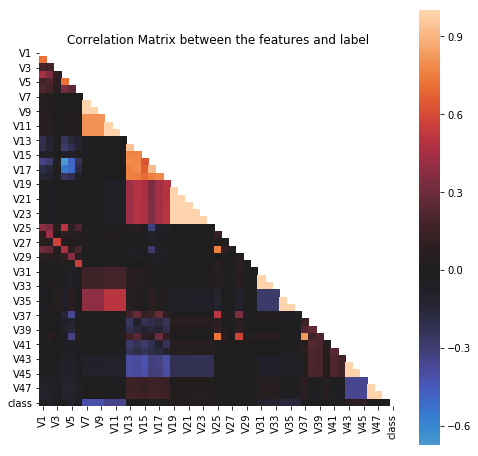

In [11]:
#Berechnung einer Korrelationsmatrix zwischen einzelnen Features
#Abhängigkeiten bereits durch die Heatmap identifizieren. Nicht nur zum Attribut 'class',
#sondern auch zwischen Features.
plt.figure(figsize=(8,8))
corr = df.corr() #Korrelationen zwischen den features und label
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.title('Correlation Matrix between the features and label')
sns_plot = sns.heatmap(data=corr,square=True,center=0,mask=mask); #Erstelle Korrelations Heatmap
fig = sns_plot.get_figure()
fig.savefig('corr_heatmap_dc_motor.png')

**Zwischenfazit**:

- Bei allen Features handelt es sich um float Datentypen, also kardinale Merkmale
- Die Daten bewegen z.T. in sehr unterschiedlichen ranges (oft um den Null-Bereich): eine Normalisierung wird im weiteren Verlauf deshalb auf jeden Fall empfohlen.
- Min und Max- Werte weichen teilweise sehr stark von dem Mittelwert ab, weshalb Ausreißer untersucht und ggf. bereinigt werden sollten.
- Korrelationen zwischen einigen Features sehr stark. Dieser Faktor kann beim Feature Engineering mit einbezogen werden.
- Keine starken Korrelationen zwischen der Fehlerklasse und einem bestimmten Feature erkennbar.


#### 1.3 Bereinigung von Null-Values und Duplikaten

Im Folgenden wird der Datensatz auf fehlende Werte und Duplikate untersucht.
Diese können u.a. auf Fehler bei der Messung hinweisen und Ergebnisse verzehren/verfälschen. Im Rahmen dieser Arbeit werden solche Werte, falls existent, aus dem DataFrame entfernt.

In [12]:
#Duplikatte entfernen, da diese auf einen möglichen Messfehler hindeuten können
df.drop_duplicates()
if shape == df.shape:
    print('No Duplicates')
else:
    print(shape[1]-df.shape[1],' Duplicates deleted!')

No Duplicates


In [13]:
#Überpruefen auf Null Values, also auf fehlende Daten
#Falls solche exisiteren wird für dieses Projekt der ganze feature vector gelöscht.
#Eine Ersetzung mit diveresen Methoden wäre auch denkbar.

null_values = df.isna().sum()
if sum(null_values) == 0:
    print('There is no missing data!')
else:
    for i in range(len(null_values)):
        print('Das Feature {0} contains {1} missing data points.'.format(null_values.index[i],null_values[i]))
        df.dropna()
        print("All Feature Vectors with missing data points are deleted")
        print("After that the dataset contains {0} Feature Vectors".format(df.shape[1]))

There is no missing data!


Der Datensatz enthält 49 columns. Man erkennt, dass aber nur die ersten 48 Columns 'V*' Features sind. Da es sich um eine gelabelten Datensatz handelt, stellt die letzte Spalte die tatsächlich gemessene Fehlerklasse dar. Diese wird im Folgenden von den Daten getrennt und in einem separaten Dataframe gespeichert.

 - df (Pandas Dataframe) für nativ eingelesene Daten Format: (V1...V48, Class)
 - df_data
 - df_labels

In [14]:
df_data = df.iloc[:,0:48] #Nur Features Rohformat
df_labels = df.iloc[:,-1] #Nur Label 'class'

#### 1.4 Visualisierung

Neben der Berechnung diverser Größen etc. sind vor allem Methoden der Daten-Visualisierung ein wichtiges Werkzeug, um die Daten mit wenig Aufwand zu verstehen und zu interpretieren. Die Korrelationsmatrix war bereits ein Einblick in die Methodik.
Im Folgenden werden vor allem Verteilungen visualisiert, um die Daten bezüglich möglichen Ausreißer und anderen Defiziten besser einschätzen zu können.

Verwendete Methoden:
- Histogram
- Boxplots
- Scatterplots


      Labels are stored in the Feature 'class'
      The following labels are stored in the dataset
      
[ 1  2  3  4  5  6  7  8  9 10 11]
Distribution of the different labels in the dataste:


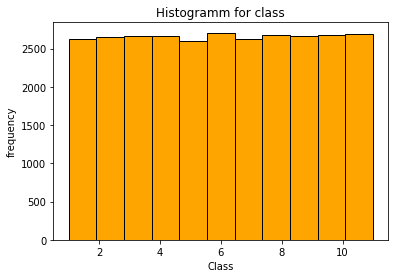

In [15]:
#Hierbei handelt es sich um einen gelabelten Datensatz. Die Labels befinden sich
#im Feature 'class'. Welche Werte tauchen auf und wie sind diese im Datensatz verteilt?
print("""
      Labels are stored in the Feature 'class'
      The following labels are stored in the dataset
      """)    
print(df['class'].unique())

#Verteilung der Fehlerklassen mittels eines Histograms
print('Distribution of the different labels in the dataste:')
plt.hist(df['class'],color='orange',bins=len(df['class'].unique()), edgecolor = 'black',align='mid')
plt.xlabel('Class')
plt.ylabel('frequency')
plt.title('Histogramm for class')
plt.savefig('histogram_class_label.png')
plt.show()

Die Fehlerklassen sind weitesgehend gleich verteilt. Zumindest ist kein maßgeblicher Unterschied erkennbar. 
In Punkt 3 'Clustering' wird, falls das Verfahren geeignet ist, eine ähnliche Verteilung erwartet.

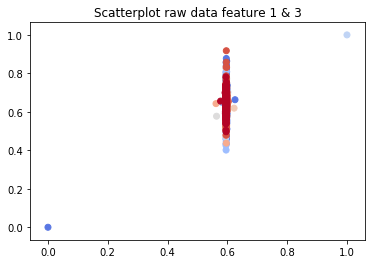

In [16]:
#Hier werden Plots erzeugt zwischen 2 Features auf Unterscheidlichen Eingabe Dataframes.
#Plot noch auf Rohdaten durchgeführt. Das jeweilige Label wird farblich hervorgehoben.

#Für plots normalisieren des df_data_z
np_array_data = df_data.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
df_data_norm = pd.DataFrame(min_max_scaler.fit_transform(np_array_data))
plt.scatter(df_data_norm.iloc[:,0], df_data_norm.iloc[:,2], c = df_labels.iloc[:], cmap=plt.cm.coolwarm)

plt.title('Scatterplot raw data feature 1 & 3')
plt.savefig('scatter_V1_and_V3_raw.png')
plt.show();

Bereits dieser plot zeigt bereits, dass es gewisse Extrem-Werte in dem Datensatz gibt. Diese Outliers gilt es genauer zu betrachten. Mit Boxplots werden die Verteilung innerhalb eines Features visualisiert.

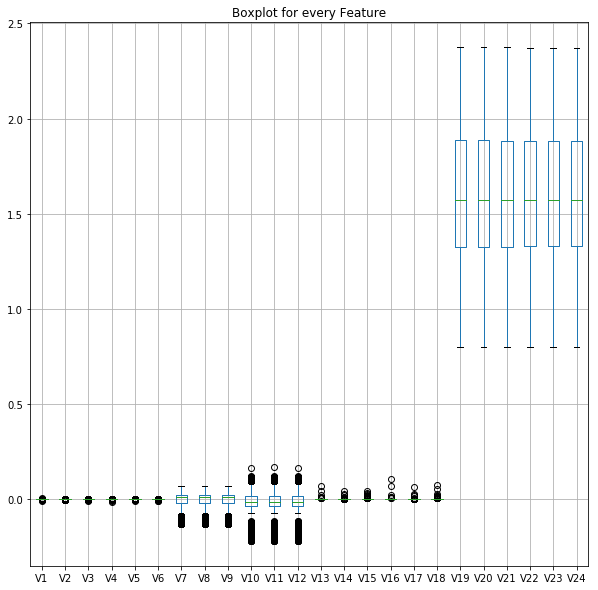

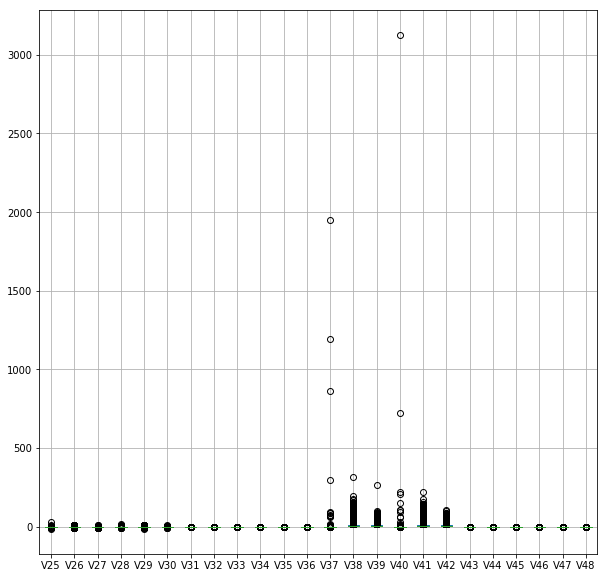

In [17]:
#BoxPlots für jedes Feature
column_list = list(df_data.columns) #Speichere Columns in einer Liste

plt.figure(figsize=(10,10)) #Größe des Plots
plt.title('Boxplot for every Feature')
boxplot_1 = df_data.boxplot(column_list[:int(len(column_list)/2)]) #Plot Boxplots für die Hälfte der Features
plt.savefig('boxplots_features_raw1.png')
plt.figure(figsize=(10,10))
boxplot_2 = df_data.boxplot(column_list[int(len(column_list)/2):]) #Boxplots der anderen Hälfte der Features
plt.savefig('boxplots_features_raw2.png')
plt.show()

Vor allem bei den Features V37-V40 gibt es auffällige Werte. Vereinzelt weichen einzelne Werte sehr stark von den Messwerten ab. Diese können entweder so gewollt sein, oder aber weisen auf mögliche Fehler in der Datenerfassung hin. Falls dies so ist, können diverse ML-Algorithmen zu verzerrten Ergebnissen kommen.

### 2 Feature Selection and Feature Engineering

Obwohl die Qualität des Datensatzes bereits sehr gut ist, hat das vorangegangene Kapitel gezeigt, dass u.a. durch Ausreißer, weitere Maßnahmen erfoderlich sind um den Datensatz für die ML Verfahren vorzubereiten. Diese müssen auch nicht zwingend was mit der Qualität der Daten zu tun haben, sondern können den ML Prozess verbessern und verschlanken.


#### 2.1 Normalisierung

Auf Grund dessen, dass sich die Feature Werte in unterschiedlichen Ranges befinden und bei den meisten Verfahren mit Distanzmetriken gearbeitet wird, ist eine Normalisierung des Datensatzes erforlderlich. Normalisiert wird über den Trainingssatz. Deshalb erfolgt auch eine Aufteilung in Test und Trainings Datensatz.
Anschließend wird über das MinMax-Vefahren normalisiert. Die Skalierung wird am Train-Datensatz gefitted und der Wertebereich begrenzt sich auf Werte von 0-1

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_data_train,df_data_test,df_labels_train,df_labels_test = train_test_split(df_data, df_labels, test_size=0.33, random_state=42)

scaler.fit(df_data_train)

df_data_train_norm = pd.DataFrame(scaler.transform(df_data_train),columns=df_data.columns)
df_data_test_norm = pd.DataFrame(scaler.transform(df_data_test),columns=df_data.columns)

**Verfügbare Datensatz**:
- df_data_train_norm *Normaliserte Features im Testdatensatz*
- df_data_test_norm *Normaliserte Features im Trainingsdatensatz*

Die Labels befinden sich in:
- df_labels_train
- df_labels_test

#### 2.2 Außreiser / Outlier entfernen

Da einige Features z.T. sehr starke Ausreißer beinhalten, wie in den Boxplots zu sehen ist, werden weitere Dataframes erstellt, in denen die Ausreißer in beide Richtungen herausgefilter wurden. Dies wird über den Z-Score gesteuert. Daten Punkte mit einem Z-Score über 4 sind in einer Normalverteilung sehr selten anzutreffen und können auf irgendwelche Fehler schließen. Deshalb werden alle Datenpunkte mit einem Z-Score größer als 4, als Outlier deklariert und der Feature Vector in dem er sich befindet aus dem Trainingsdatensatz gelöscht. Die Normalisierung für diesen Datensatz erfogt erst nach der Entfernung der Ausreißer, da es bei dem MinMax-Verfahren sonst zu Verzerrungen führen würde.

In [19]:
from scipy import stats

#Berechne Z-Score für Trainingsdatensatz
z = np.abs(stats.zscore(df_data_train))

df_data_train_z = df_data_train[(z < 4).all(axis=1)] #Entferne alle Outlier mit einem Z-Score größer als 4
print(df_data_train_z.shape) #Falls welche vorhanden, weniger Feature Vectoren

#Join mit den ursprünglichen Labels
df_data_z = pd.concat([df_labels_train,df_data_train_z],axis=1)

print(df_data_z.shape)
df_data_z.dropna(inplace=True) #Labels ohne Feature Vector werden gedroppt
print(df_data_z.shape)
print(df_data_z.head())

df_data_train_z = df_data_z.iloc[:,1:49] #Nur Features
df_labels_train_z = df_data_z.iloc[:,0] #Nur label 'class'

#Normalisierung erst nach der Outlier Entfernung
df_data_train_norm_z = pd.DataFrame(scaler.transform(df_data_train_z),columns=df_data.columns)

#Keine Änderungen am Test Set - nur kopiert
df_labels_test_z = df_labels_test.copy()
df_data_test_norm_z = df_data_test_norm.copy()

(18294, 48)
(19600, 49)
(18294, 49)
   class            V1            V2        V3            V4            V5  \
0      1  2.913200e-06 -5.247700e-06  0.000003 -6.056100e-06  2.778900e-06   
1      1 -9.584900e-07  5.214300e-08 -0.000047  6.453700e-07 -2.304100e-06   
2      1 -2.566600e-06 -1.679500e-07  0.000015 -1.598400e-06  8.709200e-07   
4      1 -6.573800e-07 -3.951900e-07  0.000032 -5.296100e-06 -1.605800e-06   
5      1 -2.236600e-06 -1.799500e-06  0.000008 -4.673700e-06  2.821600e-06   

             V6        V7        V8        V9   ...       V39      V40  \
0 -3.752400e-06  0.030804  0.030810  0.030806   ...    3.6048 -0.59314   
1  5.499900e-05  0.031154  0.031154  0.031201   ...    3.9757 -0.61124   
2  1.496100e-05  0.031071  0.031071  0.031056   ...    9.8584 -0.63618   
4  7.566000e-07  0.029416  0.029416  0.029385   ...    3.3788 -0.59578   
5  3.826600e-07  0.027720  0.027722  0.027713   ...    6.6790 -0.41223   

       V41      V42     V43     V44     V45     V4

Scatterplot after filtering out outliers.


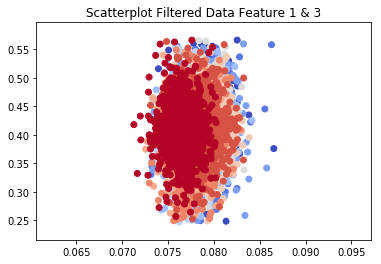

In [20]:
plt.scatter(df_data_train_norm_z.iloc[:,0], df_data_train_norm_z.iloc[:,2], c = df_labels_train_z.iloc[:], cmap=plt.cm.coolwarm)
print('Scatterplot after filtering out outliers.')
plt.title('Scatterplot Filtered Data Feature 1 & 3')
plt.savefig('scatter_V1_and_V3_filterd.png')

Der gleiche Plot, wie in einem Kapitel zu vor zeigt, dass die Datenpunkte näher beianander liegen und es keine verzeinzelten Datenpunkte mehr gibt, die extrem weit weg liegen.

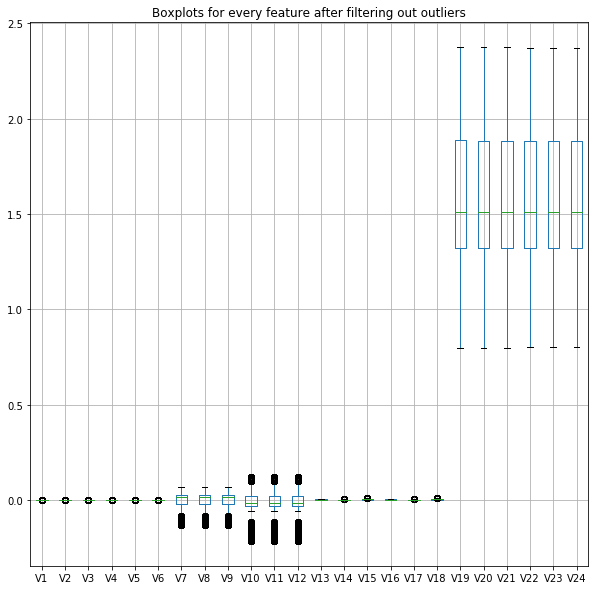

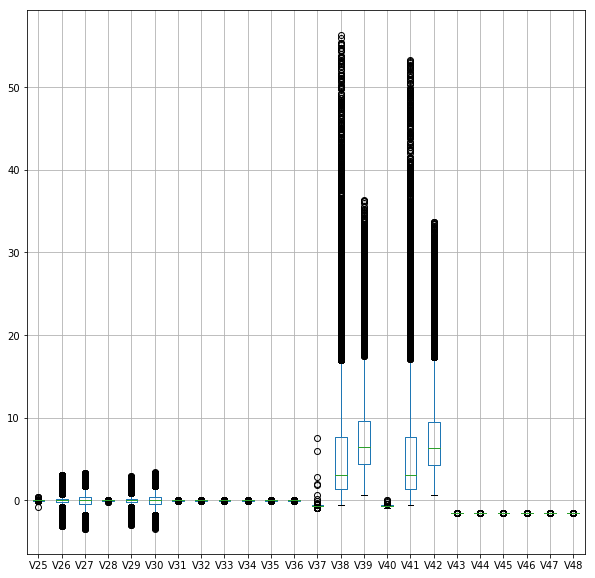

In [21]:
#BoxPlots für jedes Feature
column_list = list(df_data_train_z.columns) #Speichere Columns in einer Liste

plt.figure(figsize=(10,10)) #Größe des Plots
plt.title('Boxplots for every feature after filtering out outliers')
boxplot_1 = df_data_train_z.boxplot(column_list[:int(len(column_list)/2)]) #Plot Boxplots für die Hälfte der Features
plt.savefig('boxplots_features_filt1.png')
plt.figure(figsize=(10,10))
boxplot_2 = df_data_train_z.boxplot(column_list[int(len(column_list)/2):]) #Boxplots der anderen Hälfte der Features
plt.savefig('boxplots_features_filt2.png')
plt.show()

Durch das entfernen einer gewissen Anzahl von Extremwerten konnten die Daten, wie in den Plots erkennbar, näher zusammengerückt werden. Dies kann bei einigen ML Verfahren extreme Verbesserungen herbeiführen.

**Verfügbare Datensätze**:
- df_data_train_norm_z
- df_data_test_norm_z


Die Labels befinden sich in:
- df_labels_test_z
- df_labels_train_z


#### 2.3 Principal Component Analysis (PCA)


Anzahl der Komponenten, um 95% der Varianz in den Daten/Features zu erhalten: 6
Anzahl der Komponenten, um 99% der Varianz in den Daten/Features zu erhalten: 13
Anzahl der Komponenten, um 99,9% der Varianz in den Daten/Features zu erhalten: 19


C:\Users\alewi\Anaconda3\lib\site-packages\matplotlib\figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


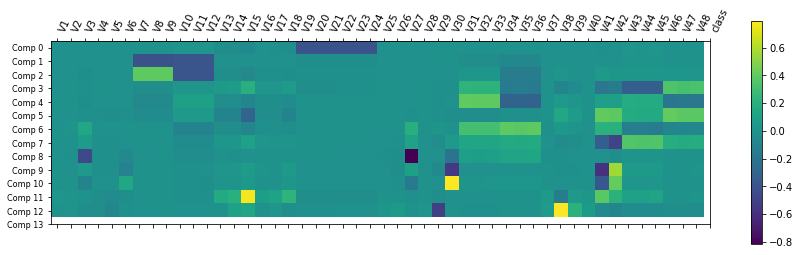

In [22]:
from sklearn.decomposition import PCA


# Model wird initialisiert, mit einer Varianz von 95%/99%/99,9%
pca95 = PCA(.95)
pca95.fit(df_data_train_norm)

pca99 = PCA(.99)
pca99.fit(df_data_train_norm)

pca999 = PCA(.999)
pca999.fit(df_data_train_norm)

print("Anzahl der Komponenten, um 95% der Varianz in den Daten/Features zu erhalten: " + str(pca95.n_components_))
print("Anzahl der Komponenten, um 99% der Varianz in den Daten/Features zu erhalten: " + str(pca99.n_components_))
print("Anzahl der Komponenten, um 99,9% der Varianz in den Daten/Features zu erhalten: " + str(pca999.n_components_))


# Das gelernte Mapping wird auf Test- und Trainings-Set angewendet
df_data_train_norm_pca = pd.DataFrame(pca99.transform(df_data_train_norm),index=df_data_train_norm.index)
df_data_test_norm_pca = pd.DataFrame(pca99.transform(df_data_test_norm),index=df_data_test_norm.index)

df_labels_train_pca = df_labels_train.copy()
df_labels_test_pca = df_labels_test.copy()

plt.matshow(pca99.components_,cmap='viridis')
components = [0] * 14
i = 0
while i < 14:
    components[i] = 'Comp ' + str(i)
    i += 1
    
amountComponents = [0] * 14
i = 0
while i < 14:
    amountComponents[i] = i
    i += 1


plt.yticks(amountComponents,components,fontsize=8)
plt.colorbar()
plt.xticks(range(len(df.columns)),df.columns,rotation=65,ha='left')
plt.tight_layout()
plt.savefig('pca_analysis_99_variance.png')
plt.show()# 

#### 2.4 Feature Elimination

Auch zu viele Features können bei der Modellbildung mehr negativ, als positiv wirken. Bei zu vielen, vor allem unnötige, Features besteht die Gefahr des Overfittings. Das Modell ist zu gut an die Trainingsdaten angepasst und weist schlechte Ergebnisse mit Testdaten auf. Außerdem kann dadurch Zeit und Ineffizienz reduziert werden:

- Overfitting vermeiden
- Garbage In - Garbage Out --> sinnlose Information rauswerfen
- Erklärbarkeit beibehalten - weniger Features = interpretierbarer

Eine Möglichkeit ist die Selektion von Features mit dem **Chi²-Test**. Hierbei wird bestimmt, wie abhängig bzw. unabhängig zwei Features von einander sind. Dies kann man für jede Feature-Label Konstellation druchführen und sich die x-besten Features aussuchen. 

Im Folgenden erfolgt ein Chi²-Test, der die 20 besten Features raussucht. Das Ergebnis wird in dem Dataframe df_selected gesichert und kann später im Vergleich mit dem ursprünglichen Dataframe verwendet werden.

In [23]:
from sklearn.feature_selection import SelectKBest,chi2

#CHI²-Test auf normalisierten Datensatz
# Die Selektion kann auf den ganzen Datensatz angewendet werden, da keine 
# Datenpunkte sondern komplette Features entfernt werden.

selector = SelectKBest(k=20,score_func=chi2) #Chi²-Test und Selektion der 20 besten Features
selector.fit_transform(df_data_norm,df_labels) #Wende diese Merkmalsselektionsfunktion auf x und das label y an

#Extrahiere die bool Werte zu den columns und erstelle neues Dataframe, mit cols=True
cols = selector.get_support()
selected_features = []

feature_names = df.columns

for bool, feature in zip(cols, feature_names):
    if bool:
        selected_features.append(feature)
#Speicher Ergebnisse in dem Dataframe df_selected
df_selected = df[selected_features]
print(df_selected.columns)
print(df_selected.head())

Index(['V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V19', 'V20', 'V21', 'V22',
       'V23', 'V24', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V43', 'V45'],
      dtype='object')
         V7        V8        V9       V10  ...       V35       V36     V43     V45
0  0.030804  0.030810  0.030806 -0.033520  ... -0.001342 -0.001375 -1.4967 -1.4967
1  0.031154  0.031154  0.031201 -0.032789  ... -0.001519 -0.001410 -1.4956 -1.4956
2  0.031071  0.031071  0.031056 -0.029695  ... -0.003324 -0.003319 -1.4990 -1.4990
3  0.030947  0.030941  0.030823 -0.032171  ... -0.001606 -0.001518 -1.4963 -1.4963
4  0.029416  0.029416  0.029385 -0.028420  ... -0.004594 -0.004609 -1.4984 -1.4984

[5 rows x 20 columns]


In [0]:
#Kopiere bestehende Train und Test Set in neues Dataframes, aber nur mit den besten Chi²-Features

df_data_train_norm_chi = df_data_train_norm[selected_features].copy()
df_data_test_norm_chi = df_data_test_norm[selected_features].copy()

df_labels_train_chi = df_labels_train.copy()
df_labels_test_chi = df_labels_test.copy()

In [25]:
df_data_train_norm_chi.head()

,V7,V8,V9,V10,V11,V12,V19,V20,V21,V22,V23,V24,V31,V32,V33,V34,V35,V36,V43,V45
0,0.725733,0.725596,0.725886,0.687702,0.680771,0.685666,0.534660,0.534764,0.534972,0.534804,0.534838,0.534925,0.401280,0.408064,0.411846,0.512522,0.531479,0.515845,0.402062,0.373900
1,0.941324,0.941530,0.941219,0.813787,0.805584,0.810847,0.889721,0.889764,0.889645,0.894059,0.894052,0.893553,0.475848,0.482334,0.484477,0.496194,0.515720,0.503806,0.315169,0.284457
2,0.774099,0.774140,0.773770,0.731900,0.724540,0.729048,0.815398,0.815555,0.815905,0.814954,0.814942,0.815169,0.391944,0.399125,0.402663,0.515434,0.534234,0.516730,0.354934,0.328446
3,0.796721,0.796650,0.796750,0.443914,0.439417,0.442642,0.074297,0.074317,0.074349,0.075338,0.075343,0.075386,0.360042,0.367426,0.371293,0.472236,0.491847,0.475498,0.459499,0.431085
4,0.622986,0.622866,0.622985,0.601516,0.595432,0.599717,0.328751,0.328817,0.328984,0.328149,0.328170,0.328346,0.368057,0.375399,0.379107,0.512335,0.531148,0.515593,0.425626,0.398827


Verwendbare Dataframes:

- **df_data_train_norm_chi** *Trainings DataFrame mit 20 besten Features*
- **df_data_test_norm_chi** *Test DataFrame mit 20 besten Features*

Die Labels dazu befinden sich in:
- **df_labels_train_chi** *Training Labels*
- **df_labels_test_chi** *Test Labels*

### 3 Clustering

Bei Clustering handelt es sich um unsupervised learning (=unüberwachtes Lernen / ohne Labels)
Dazu gehören zum Beispiel die Algorithmen KMeans und HierarchicalClustering

#### 3.1 KMeans

Kmeans braucht als Vorgabe eine Anzahl von k Clustern, die er suchen soll. Es ist bekannt, dass der Datensatz 11 Klassen enthält und somit mit k=11 begonnen wird. Anschließend wird die Verteilung der KMeans Cluster angzeigt. Die Verteilung sollte im optimal Fall ähnlich sein.

In [26]:
from sklearn.cluster import KMeans

print('the dataset contains just float datatypes. so it  is possibile to normalize over every feature.')
#Keine Aufteilung in train und test erforderlich, da wir train und Model nicht
#überrprüfen können.

scaler_kmeans = preprocessing.MinMaxScaler()
norm_df = pd.DataFrame(scaler.fit_transform(df_data))

print("""There are 11 different classes.
      Initialize the model with 11 clusters.""")

model_11k = KMeans(n_clusters=11,max_iter=1000)
print('Train model with n_cluster=11 ....')
model_11k.fit(norm_df)
print('Training finished!')

erg = pd.DataFrame(columns=['KMeans'],data=model_11k.labels_)
erg['class_org'] = df['class']

print("""
      Return of the results
      KMeans are named the classes / clusters out of the KMean Algorithm,
      where as class_org are the orgininal classes.
      """)
print(erg.head())

the dataset contains just float datatypes. so it  is possibile to normalize over every feature.
There are 11 different classes.
      Initialize the model with 11 clusters.
Train model with n_cluster=11 ....
Training finished!

      Return of the results
      KMeans are named the classes / clusters out of the KMean Algorithm,
      where as class_org are the orgininal classes.
      
   KMeans  class_org
0       5          1
1       5          1
2       5          1
3       5          1
4       5          1


frequency distribution of the learned classes in the dataset:


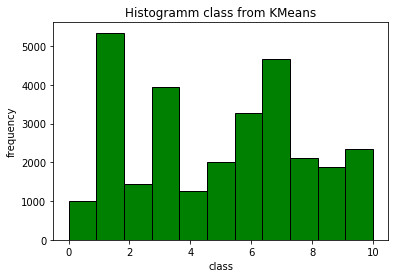

In [27]:
print('frequency distribution of the learned classes in the dataset:')
plt.hist(erg['KMeans'],color='green',bins=len(erg['KMeans'].unique()), edgecolor = 'black',align='mid')
plt.xlabel('class')
plt.ylabel('frequency')
plt.title('Histogramm class from KMeans')
plt.savefig('hist_kmeans_filt_df_11k.png')
plt.show()

**Ergebnis:** Man keine genaue Zuordnung der Klassen tätigen. Jedoch erkennt man an der Verteilung der KMeans Kluster deutliche Unterschiede zu der orginalen Klassenverteilung.

Pick n_cluster with "Elbow Method":


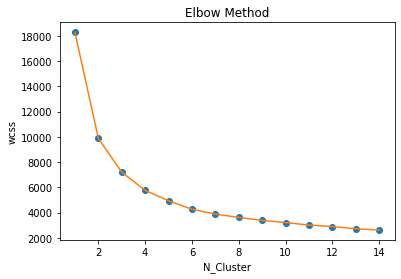

In [28]:
#Auswahl der optimalen Kluster über wcss Verfahren.
#WCSS ist die sum der quadrierten Distanzen eines Punktes im Kluster und
#seinem Centroid. Auswahl von n_cluster über dieses Verfahren.

print('Pick n_cluster with "Elbow Method":')

wcss = []

for i in range(1,15):
    model = KMeans(n_clusters=i,init='k-means++',max_iter=200,random_state=0)
    model.fit(norm_df)
    wcss.append(model.inertia_)
    

plt.plot(range(1,15),wcss,'o')
plt.plot(range(1,15),wcss,'-')
plt.xlabel('N_Cluster')
plt.ylabel('wcss')
plt.title('Elbow Method')
plt.savefig('elbow_method_plot.png')
plt.show()

Nach der Elbow-Method, wird er Grafik zufolge der Paramter n_cluster auf 5 Kluster gesetzt

[3 3 3 ... 4 4 4]
frequency distribution of the learned classes in the dataset:


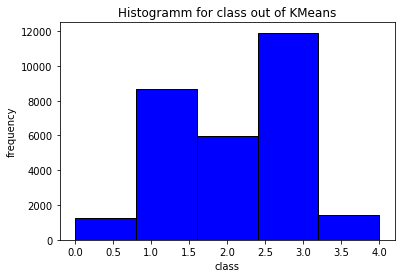

In [29]:
model_5k = KMeans(n_clusters=5,init='k-means++',max_iter=200,random_state=0)
labels_5k = model_5k.fit_predict(norm_df)

print(labels_5k)

print('frequency distribution of the learned classes in the dataset:')
plt.hist(labels_5k,color='blue',bins=5, edgecolor = 'black',align='mid')
plt.xlabel('class')
plt.ylabel('frequency')
plt.title('Histogramm for class out of KMeans')
plt.savefig('hist_kmeans_filt_df_5k.png')
plt.show()

Zu diesem Clustering kann keine Wertung abgegeben werden. Hier werden rein basierend auf der Berechnungen 5 Klassen zusammengeführt. Diese können unabhängig von den Fehlerklassen andere Gemeinsamkeiten aufweisen. Die Untersuchung dieser ist nicht Bestandteil der Arbeit.

#### 3.2 Hierarchisches Clustern

In diesem Projekt wird das Verfahren gewählt, wo zu Beginn der Modellbildung jeder Datenpunkt einem Cluster hinzugefügt.
Durch die geringsten Distanzen, werden einzelne Cluster zusammengeführt. --> AgglomerativeClustering

Wie und welche Distanzberechnung verwendet wird, wird im weiteren Vorgehen erläutert.

Das Dendrogram visualisiert, wie die Datenpunkte Schritt für Schritt zusammengeführt werden und wie groß die Distanzen zwischen den Datenpunkten/Klustern jeweils ist.

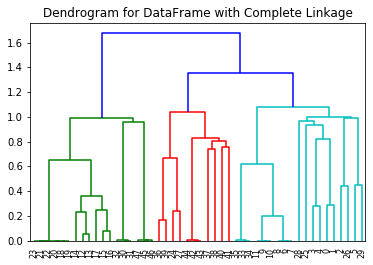

In [30]:
#Plot Dendrogram for AgglomerativeClusterin
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

z = linkage(norm_df.values.T, method='complete', metric='correlation')
dendrogram = dendrogram(z, labels=norm_df.columns)
plt.title('Dendrogram for DataFrame with Complete Linkage')
plt.savefig('dendrogram_hclust.png')
plt.show()

frequency distribution of the learned classes in the dataset:


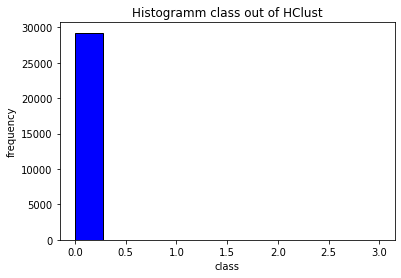

In [31]:
linkage = 'complete' #Die Distanzen zwischen zwei Clustern werden zwischen allen Datenpunkten berechnet.

# Aus dem Dendrogram können wir entnehmen, dass es anscheinend 4 Cluster gibt.
# Diese haben auf den ersten Blick auch nichts mit den Fehlerklassen zu tun,
# sondern basieren rein auf den Ergebnissen des Dendrogramms
hclust = AgglomerativeClustering(linkage=linkage,n_clusters=4) 
hclust.fit(norm_df)

hclust.labels_

print('frequency distribution of the learned classes in the dataset:')
plt.hist(hclust.labels_,color='blue',bins=11, edgecolor = 'black',align='mid')
plt.xlabel('class')
plt.ylabel('frequency')
plt.title('Histogramm class out of HClust')
plt.savefig('hist_hclust_4_clust.png')
plt.show()

frequency distribution of the learned classes in the dataset:


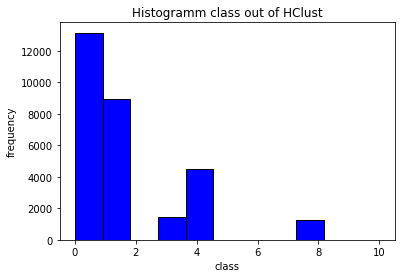

In [32]:
# Jedoch wissen wir, dass 11 Fehlerklassen existieren. Deshalb wird das ganze 
# noch mit 11 Clustern durchgeführt. Auch hier sollte, falls es ein sinnvolles
# Clusterverfahren für den Anwendungsfall ist, eine ähnliche Verteilung bei den
# Fehlerklassen auftauchen

hclust = AgglomerativeClustering(linkage=linkage,n_clusters=11) #Da 11 Fehlerklassen exisitieren
hclust.fit(norm_df)

hclust.labels_

print('frequency distribution of the learned classes in the dataset:')
plt.hist(hclust.labels_,color='blue',bins=11, edgecolor = 'black',align='mid')
plt.xlabel('class')
plt.ylabel('frequency')
plt.title('Histogramm class out of HClust')
plt.savefig('hist_hclust_11_clust.png')
plt.show()

### 4. Classification

#### 4.1 1-nearest Neighbour 

Training besteht nur aus Laden der Daten. Keine Berechnungen notwendig.

Im Testdatensatz wird jeder Datenpunkt genommen und die Distanz zu jedem Datenpunkt im Trainingsdatensatz berechnet. Der Datenpunkt im Training mit der geringsten Distanz zum neuen Datenpunkt ist ausschlaggebend, welcher Klasse der neue Datenpunkt zugewiesen wird.

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from timeit import default_timer as timer
from datetime import timedelta

In [0]:
def KNN_Algo(train_data,test_data,train_labels,test_labels,n):
    """
    KNN Algorithm function. Initializing, training and test.
    Returns the model and the result values.
    """
    #Initialisiere KNN Klassifikator
    knn = KNeighborsClassifier(n_neighbors=n, metric='euclidean', algorithm='auto')
  
    #Starte Training
    start = timer() #Stoppe Trainingszeit
    knn.fit(train_data,train_labels)
    end = timer() #Ende Training
    train_duration = timedelta(seconds=end-start)
    print("Training finished. Duration:")
    print(train_duration)
    print("\n")
  
    # Test des Models auf Trainingsdaten
    start = timer() #Stoppe Zeit fuer Prediction
    y_pred = knn.predict(train_data)
    end = timer() #Ende Prediction
    test_duration = timedelta(seconds=end-start)
    y_pred_test = knn.predict(test_data)
    
    print("Prediction finished. Duration:")
    print(test_duration)
    print("\n")
  
    #Predict the response for training dataset
    print("Model Score of training:")
    train_score = knn.score(train_data, train_labels)
    print(train_score)
    print("\n")

    #Predict the response for an unseen dataset
    print("Model Score of unseen test data:")
    test_score = knn.score(test_data, test_labels)
    print(test_score)
    print("\n")
  
    #Print Confusion Matrix for training dataset
    print("Confusion Matrix of labels and predicted labels in test data:")
    cm = confusion_matrix(test_labels, y_pred_test)
    print(cm)

    res_list = [train_duration,test_duration,train_score,test_score]

    return res_list,cm,knn

In [35]:
#1. Durchführung mit normalisiertem Datensatz.
print('1-NN Algo with normalized data:')
print('\n')
res_list_onn_norm,cm_onn_norm,onn_norm = KNN_Algo(df_data_train_norm,df_data_test_norm,df_labels_train,df_labels_test,1) #Just 1 n_neighbors

1-NN Algo with normalized data:


Training finished. Duration:
0:00:00.053410


Prediction finished. Duration:
0:00:00.955113


Model Score of training:
1.0


Model Score of unseen test data:
0.9751424132573796


Confusion Matrix of labels and predicted labels in test data:
[[805   0   1   0   0  36   0   0   2   0   0]
 [  0 838   0   0   0   1   0   0   1  38   0]
 [  0   0 873   1   5   1   0   1   0   0   0]
 [  0   0   4 865  13   0   0   2   0   0   0]
 [  0   0   5   9 867   4   0   8   0   0   0]
 [ 23   0   1   1   0 832   0   2  21   0   0]
 [  0   0   0   0   0   0 851   0   0   0   0]
 [  0   0   0   0   2   8   0 862   0   0   0]
 [  1   1   1   0   0  21   0   0 901   1   0]
 [  0  25   0   0   0   0   0   0   0 855   0]
 [  0   0   0   0   0   0   0   0   0   0 866]]


In [0]:
#Protokolliere Ergebnisse fuer 1-NN mit normalisierten Daten
results.loc['1-NN','Runtime Training':'Score Test-Set'] = res_list_onn_norm

In [37]:
#2. Durchführung mit normalisiertem Datensatz ohne potenzielle Outliers.
print('1-NN Algo with normalized data without outliers:')
print('\n')
res_list_onn_z,cm_onn_z,onn_z = KNN_Algo(df_data_train_norm_z,df_data_test_norm_z,df_labels_train_z,df_labels_test_z,1)

1-NN Algo with normalized data without outliers:


Training finished. Duration:
0:00:00.046426


Prediction finished. Duration:
0:00:00.927025


Model Score of training:
1.0


Model Score of unseen test data:
0.9758674262040393


Confusion Matrix of labels and predicted labels in test data:
[[812   0   0   0   0  30   0   1   1   0   0]
 [  1 841   0   0   0   0   0   0   0  35   1]
 [  0   0 869   2   9   1   0   0   0   0   0]
 [  0   0   1 872   8   0   0   3   0   0   0]
 [  0   0   2  12 870   1   0   8   0   0   0]
 [ 25   0   1   0   0 830   0   2  22   0   0]
 [  0   0   0   0   0   0 851   0   0   0   0]
 [  3   0   0   0   3   5   0 861   0   0   0]
 [  1   1   1   0   0  22   0   0 900   1   0]
 [  0  30   0   0   0   0   0   0   0 850   0]
 [  0   0   0   0   0   0   0   0   0   0 866]]


In [0]:
#Protokolliere Ergebnisse
results.loc['1-NN','Runtime Training without Outliers':'Score Test-Set without Outliers'] = res_list_onn_z

In [39]:
#Durchführung mit PCA Ergebnissen
print('1-NN Algo with normalized data with PCA Compoments:')
print('\n')
res_list_pca_onn,cm_onn_pca,onn_pca = KNN_Algo(df_data_train_norm_pca,df_data_test_norm_pca,df_labels_train_pca,df_labels_test_pca,1)

results.loc['1-NN',"Runtime Training PCA Features":"Score Test-Set PCA Features"] = res_list_pca_onn

1-NN Algo with normalized data with PCA Compoments:


Training finished. Duration:
0:00:00.025105


Prediction finished. Duration:
0:00:00.765180


Model Score of training:
1.0


Model Score of unseen test data:
0.9807353702744692


Confusion Matrix of labels and predicted labels in test data:
[[816   0   0   0   0  24   0   0   4   0   0]
 [  0 852   0   0   0   1   0   0   1  24   0]
 [  0   0 877   0   3   1   0   0   0   0   0]
 [  0   0   1 874   8   0   0   1   0   0   0]
 [  0   0   5   6 871   2   0   9   0   0   0]
 [ 15   0   0   0   0 843   0   1  21   0   0]
 [  0   0   0   0   0   0 851   0   0   0   0]
 [  0   0   0   0   2   5   0 865   0   0   0]
 [  0   1   1   0   0  25   0   0 898   1   0]
 [  0  24   0   0   0   0   0   0   0 856   0]
 [  0   0   0   0   0   0   0   0   0   0 866]]


In [40]:
#3. Durchführung mit normalisiertem Datensatz und KBest Features aus Chi²-Test.
print('1-NN Algo with the normalized data, but only the 20 features out of chi square test:')
print('\n')
res_list_onn_chi,cm_onn_chi,onn_chi = KNN_Algo(df_data_train_norm_chi,df_data_test_norm_chi,df_labels_train_chi,df_labels_test_chi,1)

1-NN Algo with the normalized data, but only the 20 features out of chi square test:


Training finished. Duration:
0:00:00.035764


Prediction finished. Duration:
0:00:00.786717


Model Score of training:
1.0


Model Score of unseen test data:
0.998342827550492


Confusion Matrix of labels and predicted labels in test data:
[[842   0   0   0   0   1   0   0   1   0   0]
 [  0 875   0   0   0   0   0   1   1   1   0]
 [  0   0 881   0   0   0   0   0   0   0   0]
 [  0   0   0 884   0   0   0   0   0   0   0]
 [  0   0   0   0 893   0   0   0   0   0   0]
 [  2   0   0   0   0 877   0   0   1   0   0]
 [  0   0   0   0   0   0 851   0   0   0   0]
 [  0   0   0   0   0   0   0 872   0   0   0]
 [  0   0   0   0   0   5   0   0 919   2   0]
 [  0   1   0   0   0   0   0   0   0 879   0]
 [  0   0   0   0   0   0   0   0   0   0 866]]


In [0]:
#Protokolliere Ergebnisse fuer 1-NN mit normalisierten Daten
results.loc['1-NN','Runtime Training KBest Features':'Score Test-Set KBest Features'] = res_list_onn_chi

#### 4.2. k-nearest Neighbour

Hier wird nicht nur der eine nächste Datenpunkt betrachtet, sondern eine Gruppe von Datenpunkten (wird von außen vorgegeben).
Die Klasse die überwiegt bei den n nächsten Datenpunkten, wird als Klasse für den neuen Datenpunkt verwendet.

In [0]:
#Funktion für die Berechnung des optimalen n_neigbors. Inklusive kFold-cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

def get_best_neighbors(train_data,train_labels,splits,test_size):
    """
    Compute the best number of neighbors for the KNN Algo. Use this for trainings data.
    Parameter tuning is done with cross validation. The number of splits in cv has to be an input for the function.
    """
    res = {}

    for neighbor in range(3,17,2): #Nehme eine ungerade Zahl, um eine eindeutige Entscheidung treffen zu können.
        knn = KNeighborsClassifier(n_neighbors=neighbor, metric='euclidean', algorithm='auto')
        cv = ShuffleSplit(n_splits=splits, test_size=test_size, random_state=110)
        knn.fit(train_data, train_labels)
        scores = cross_val_score(knn,train_data,train_labels,cv=cv)
        res[neighbor] = scores.mean()
        
    return res

In [43]:
#1. Finde besten n_neighbor Paramter fuer normalisierte Testdaten
best_n_df = get_best_neighbors(df_data_train_norm,df_labels_train,splits=5,test_size=0.2)

print(best_n_df)

n_norm = max(best_n_df, key=best_n_df.get)
print('Best n_neighbor for normalized data with cross val score: ',n_norm)

{3: 0.9811734693877551, 5: 0.9811734693877552, 7: 0.9798979591836734, 9: 0.9806122448979592, 11: 0.9806122448979592, 13: 0.9789795918367347, 15: 0.9777040816326531}
Best n_neighbor for normalized data with cross val score:  5


In [44]:
#1. Durchführung mit normalisiertem Datensatz.
print('KNN Algo with normalized data:')
print('\n')
res_list_knn_norm,cm_knn_norm,knn_norm = KNN_Algo(df_data_train_norm,df_data_test_norm,df_labels_train,df_labels_test,n_norm)

KNN Algo with normalized data:


Training finished. Duration:
0:00:00.056642


Prediction finished. Duration:
0:00:09.869611


Model Score of training:
0.9892857142857143


Model Score of unseen test data:
0.9798032107716209


Confusion Matrix of labels and predicted labels in test data:
[[809   0   0   0   0  31   0   1   3   0   0]
 [  0 846   0   0   0   0   0   0   3  28   1]
 [  0   0 878   1   1   0   0   0   1   0   0]
 [  0   0   4 878   2   0   0   0   0   0   0]
 [  0   0   2   7 873   2   0   9   0   0   0]
 [ 17   1   1   0   0 839   0   1  21   0   0]
 [  0   0   0   0   0   0 851   0   0   0   0]
 [  0   0   1   3   2   6   0 860   0   0   0]
 [  1   1   2   0   0  20   0   0 901   1   0]
 [  0  21   0   0   0   0   0   0   0 859   0]
 [  0   0   0   0   0   0   0   0   0   0 866]]


In [0]:
#Protokolliere Ergebnisse fuer 1-NN mit normalisierten Daten
results.loc['K-NN','Runtime Training':'Score Test-Set'] = res_list_knn_norm

In [46]:
best_n_z = get_best_neighbors(df_data_train_norm_z,df_labels_train_z,splits=5,test_size=0.2)
print(best_n_z)
n_z = max(best_n_z, key=best_n_z.get)

print('Best n_neighbor for normalized data (without outliers) with cross val score: ',n_z)

{3: 0.9858431265373053, 5: 0.9854605083356109, 7: 0.9847499316753211, 9: 0.9840940147581307, 11: 0.9836020770702378, 13: 0.9832194588685434, 15: 0.9829461601530471}
Best n_neighbor for normalized data (without outliers) with cross val score:  3


In [47]:
#2. Durchführung mit normalisiertem Datensatz ohne potenzielle Outliers.
print('KNN Algo normalized and filtered outlier data:')
print('\n')
res_list_knn_z,cm_knn_z,knn_z = KNN_Algo(df_data_train_norm_z,df_data_test_norm_z,df_labels_train_z,df_labels_test_z,n_z)

KNN Algo normalized and filtered outlier data:


Training finished. Duration:
0:00:00.043800


Prediction finished. Duration:
0:00:03.761823


Model Score of training:
0.9946430523668962


Model Score of unseen test data:
0.9787674779906784


Confusion Matrix of labels and predicted labels in test data:
[[818   0   0   0   0  24   0   0   2   0   0]
 [  1 846   0   0   0   0   0   0   0  30   1]
 [  0   0 878   0   3   0   0   0   0   0   0]
 [  0   0   2 876   4   0   0   2   0   0   0]
 [  1   0   6   7 870   1   0   8   0   0   0]
 [ 23   0   1   0   1 836   0   0  19   0   0]
 [  0   0   0   0   0   0 851   0   0   0   0]
 [  3   0   0   1   5   3   0 860   0   0   0]
 [  2   1   4   0   1  19   0   0 897   2   0]
 [  0  28   0   0   0   0   0   0   0 852   0]
 [  0   0   0   0   0   0   0   0   0   0 866]]


In [0]:
results.loc['K-NN','Runtime Training without Outliers':'Score Test-Set without Outliers'] = res_list_knn_z

In [49]:
best_n_pca = get_best_neighbors(df_data_train_norm_pca,df_labels_train_pca,splits=5,test_size=0.2)
print(best_n_pca)
n_pca = max(best_n_pca, key=best_n_pca.get)

print('Best n_neighbor for normalized data (PCA Components) with cross val score: ',n_pca)

{3: 0.983469387755102, 5: 0.9830102040816326, 7: 0.9820918367346938, 9: 0.9816836734693876, 11: 0.981326530612245, 13: 0.9810204081632653, 15: 0.9795408163265306}
Best n_neighbor for normalized data (PCA Components) with cross val score:  3


In [50]:
print('KNN Algo with PCA Components:')
print('\n')
res_list_knn_pca,cm_knn_pca,knn_pca = KNN_Algo(df_data_train_norm_pca,df_data_test_norm_pca,df_labels_train_pca,df_labels_test_pca,n_pca)

KNN Algo with PCA Components:


Training finished. Duration:
0:00:00.020597


Prediction finished. Duration:
0:00:01.491627


Model Score of training:
0.9941326530612244


Model Score of unseen test data:
0.9814603832211289


Confusion Matrix of labels and predicted labels in test data:
[[811   0   0   0   0  29   0   1   3   0   0]
 [  0 854   0   0   0   1   0   0   2  21   0]
 [  0   0 878   0   2   1   0   0   0   0   0]
 [  0   0   2 876   6   0   0   0   0   0   0]
 [  0   0   7   8 868   1   0   9   0   0   0]
 [ 10   0   1   1   0 851   0   0  17   0   0]
 [  0   0   0   0   0   0 851   0   0   0   0]
 [  0   0   2   1   2   1   0 866   0   0   0]
 [  2   1   1   0   1  23   0   0 897   1   0]
 [  0  22   0   0   0   0   0   0   0 858   0]
 [  0   0   0   0   0   0   0   0   0   0 866]]


In [0]:
results.loc['K-NN','Runtime Training PCA Features':'Score Test-Set PCA Features'] = res_list_knn_pca

In [52]:
best_n_chi = get_best_neighbors(df_data_train_norm_chi,df_labels_train_chi,splits=5,test_size=0.2)
print(best_n_chi)
n_chi = max(best_n_chi, key=best_n_chi.get)

print('Best n_neighbor for normalized data (20 "best" features) with cross val score: ',n_chi)

{3: 0.996734693877551, 5: 0.9961734693877553, 7: 0.9952551020408162, 9: 0.9951530612244899, 11: 0.9946428571428572, 13: 0.9940816326530613, 15: 0.9935714285714285}
Best n_neighbor for normalized data (20 "best" features) with cross val score:  3


In [53]:
#3. Durchführung mit normalisiertem Datensatz und KBest Features aus Chi²-Test.
print('KNN Algo with normalized data, but only 20 features out of chi square test:')
print('\n')
res_list_knn_chi,cm_knn_chi,knn_chi = KNN_Algo(df_data_train_norm_chi,df_data_test_norm_chi,df_labels_train_chi,df_labels_test_chi,n_chi)

KNN Algo with normalized data, but only 20 features out of chi square test:


Training finished. Duration:
0:00:00.033750


Prediction finished. Duration:
0:00:01.119489


Model Score of training:
0.9989285714285714


Model Score of unseen test data:
0.9976178146038323


Confusion Matrix of labels and predicted labels in test data:
[[842   0   0   0   0   1   0   0   1   0   0]
 [  0 874   0   0   1   0   0   0   1   2   0]
 [  0   0 881   0   0   0   0   0   0   0   0]
 [  0   0   0 884   0   0   0   0   0   0   0]
 [  0   0   0   0 893   0   0   0   0   0   0]
 [  2   0   0   0   0 876   0   0   2   0   0]
 [  0   0   0   0   0   0 851   0   0   0   0]
 [  0   0   0   0   0   0   0 872   0   0   0]
 [  2   1   0   0   0   7   0   0 914   2   0]
 [  0   1   0   0   0   0   0   0   0 879   0]
 [  0   0   0   0   0   0   0   0   0   0 866]]


In [0]:
results.loc['K-NN','Runtime Training KBest Features':'Score Test-Set KBest Features'] = res_list_knn_chi

In [55]:
results

,Runtime Training,Runtime Prediction,Score Trainings-Set,Score Test-Set,Runtime Training without Outliers,Runtime Prediction without Outliers,Score Trainings-Set without Outliers,Score Test-Set without Outliers,Runtime Training PCA Features,Runtime Prediction PCA Features,Score Trainings-Set PCA Features,Score Test-Set PCA Features,Runtime Training KBest Features,Runtime Prediction KBest Features,Score Trainings-Set KBest Features,Score Test-Set KBest Features
1-NN,0:00:00.053410,0:00:00.955113,1,0.975142,0:00:00.046426,0:00:00.927025,1,0.975867,0:00:00.025105,0:00:00.765180,1,0.980735,0:00:00.035764,0:00:00.786717,1,0.998343
K-NN,0:00:00.056642,0:00:09.869611,0.989286,0.979803,0:00:00.043800,0:00:03.761823,0.994643,0.978767,0:00:00.020597,0:00:01.491627,0.994133,0.98146,0:00:00.033750,0:00:01.119489,0.998929,0.997618
Bayes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Decision Tree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Random Forrest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SVM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ANN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Fazit:**

- Bestes Ergebnis mit KBest Features aus Chi²-Test
- Filtern von Outliers (0.1% Quantile) schneidet schlechter ab als  mit Outliers --> Distanzen zwischen den Datenpunkten ist geringer, da diese jetzt alle näher beianander liegen. So kommen womöglich öfter falsche Klassifikation zustande

- Sehr schnelle Trainingszeit, da Daten nur geladen werden. Dafür kann die Anwendung auf die Trainingsdaten zeitintensiv sein.

#### 4.3 Naive Bayes Classifier

In [0]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

def Bayes_Classifier(train_data,test_data,train_labels,test_labels):
    """
    Naive Bayes Classifier Algorithm function. Initializing, training and test.
    """

    #Create a Gaussian Classifier
    gnb = GaussianNB()
  
    #Starte Training
    start = timer() #Stoppe Trainingszeit
    gnb.fit(train_data,train_labels)
    end = timer() #Ende Training
    train_duration = timedelta(seconds=end-start)
    print("Training finished. Duration:")
    print(train_duration)
    print("\n")

    # Test des Models auf Trainingsdaten
    start = timer() #Stoppe Zeit fuer Prediction
    y_pred = gnb.predict(train_data)
    end = timer() #Ende Prediction
    y_pred_test = gnb.predict(test_data)
  
    test_duration = timedelta(seconds=end-start)
    print("Prediction finished. Duration:")
    print(test_duration)
    print("\n")

    #Predict the response for training dataset
    print("Model Score of training:")
    train_score = gnb.score(train_data, train_labels)
    print(train_score)
    print("\n")

    #Predict the response for an unseen dataset
    print("Model Score of unseen test data:")
    test_score = gnb.score(test_data, test_labels)
    print(test_score)
    print("\n")

    #Print Confusion Matrix for training dataset
    print("Confusion Matrix of labels and predicted labels in test data:")
    cm = confusion_matrix(test_labels, y_pred_test)
    print(cm)

    res_list = [train_duration,test_duration,train_score,test_score]
    return res_list,cm,gnb

In [57]:
#1. Durchführung mit normalisiertem Datensatz.
print('Bayes Classifier Algo with normalized data:')
print('\n')
res_list_gnb_norm,cm_gnb_norm,gnb_norm = Bayes_Classifier(df_data_train_norm,df_data_test_norm,df_labels_train,df_labels_test)

Bayes Classifier Algo with normalized data:


Training finished. Duration:
0:00:00.033778


Prediction finished. Duration:
0:00:00.179122


Model Score of training:
0.7059183673469388


Model Score of unseen test data:
0.6988089073019161


Confusion Matrix of labels and predicted labels in test data:
[[797   0   0   0   0   1   0   1  45   0   0]
 [  0 325   0   0   0   2   0   0  31 519   1]
 [  0   1 854  16   4   0   0   6   0   0   0]
 [  0   0  72 801   2   0   3   6   0   0   0]
 [  0   0 287 466   1   0   0 138   1   0   0]
 [398   0  22   0   0  14   0   1 445   0   0]
 [  0   0   0  42   0   0 809   0   0   0   0]
 [  2   0  48 264   5   0   0 550   3   0   0]
 [ 32   2   0   0   0   7   0   0 884   1   0]
 [  0  22   0   0   0   0   0   0  11 847   0]
 [  0   1   0   0   0   0   0   0   0   0 865]]


In [0]:
results.loc['Bayes','Runtime Training':'Score Test-Set'] = res_list_gnb_norm

In [59]:
#2. Durchführung mit normalisiertem Datensatz ohne potenzielle Outliers.
print('Bayes Classifier normalized and filtered outlier data:')
print('\n')
res_list_gnb_z,cm_gnb_z,gnb_z = Bayes_Classifier(df_data_train_norm_z,df_data_test_norm_z,df_labels_train_z,df_labels_test_z)

Bayes Classifier normalized and filtered outlier data:


Training finished. Duration:
0:00:00.020578


Prediction finished. Duration:
0:00:00.167061


Model Score of training:
0.8590794796108013


Model Score of unseen test data:
0.8540652511651994


Confusion Matrix of labels and predicted labels in test data:
[[718   0   0   0   0 104   0   0  22   0   0]
 [  0 717   0   0   0   0   0   0   4 156   1]
 [  0   0 792   8  78   1   0   2   0   0   0]
 [  0   0  71 801   7   1   0   4   0   0   0]
 [  0   0  58  59 654   0   0 122   0   0   0]
 [ 81   0   4   0   1 692   0   0 102   0   0]
 [  0   0   0   0   0   0 851   0   0   0   0]
 [  0   0   0  13 110   0   0 749   0   0   0]
 [  5   3   0   0   0 269   0   0 649   0   0]
 [  0 122   0   0   0   0   0   0   0 758   0]
 [  0   0   0   0   1   0   0   0   0   0 865]]


In [0]:
results.loc['Bayes','Runtime Training without Outliers':'Score Test-Set without Outliers'] = res_list_gnb_z

In [61]:
print('Bayes Classifier normalized PCA Features:')
print('\n')
res_list_gnb_pca,cm_gnb_pca,gnb_pca = Bayes_Classifier(df_data_train_norm_pca,df_data_test_norm_pca,df_labels_train_pca,df_labels_test_pca)

Bayes Classifier normalized PCA Features:


Training finished. Duration:
0:00:00.016644


Prediction finished. Duration:
0:00:00.026949


Model Score of training:
0.7805102040816326


Model Score of unseen test data:
0.7727602278612118


Confusion Matrix of labels and predicted labels in test data:
[[706   0  12   0   7  88   0  16  15   0   0]
 [  0 714   0   0   0   1   0   0  14 148   1]
 [  0   0 729  30  94  15   0   5   8   0   0]
 [  0   0  71 730  48   0   7  28   0   0   0]
 [  0   0  83  71 566   0   1 172   0   0   0]
 [218   0  30   0   7 473   0   4 148   0   0]
 [  0   0   0  27   0   0 824   0   0   0   0]
 [  9   0   0  45 231   0   2 585   0   0   0]
 [ 83   4  11   0   9 256   0   0 563   0   0]
 [  0 174   0   0   0   0   0   0   1 705   0]
 [  0   0   0   0   0   0   0   0   0   0 866]]


In [0]:
results.loc['Bayes','Runtime Training PCA Features':'Score Test-Set PCA Features'] = res_list_gnb_pca

In [63]:
#3. Durchführung mit normalisiertem Datensatz und KBest Features aus Chi²-Test.
print('Bayes Classifier Algo with normalized data, but only 20 features out of chi square test:')
print('\n')
res_list_gnb_chi,cm_gnb_chi,gnb_chi = Bayes_Classifier(df_data_train_norm_chi,df_data_test_norm_chi,df_labels_train_chi,df_labels_test_chi)

Bayes Classifier Algo with normalized data, but only 20 features out of chi square test:


Training finished. Duration:
0:00:00.018869


Prediction finished. Duration:
0:00:00.030698


Model Score of training:
0.8270918367346939


Model Score of unseen test data:
0.8264111859140342


Confusion Matrix of labels and predicted labels in test data:
[[696   0   0   0   0 137   0   0  11   0   0]
 [  0 714   0   0   0   0   0   0   8 155   1]
 [  0   0 773  15  93   0   0   0   0   0   0]
 [  0   0  72 805   7   0   0   0   0   0   0]
 [  0   0  90  52 638   0   0 113   0   0   0]
 [ 92   0   5   0   0 615   0   3 165   0   0]
 [  0   0   0   0   0   0 851   0   0   0   0]
 [  0   0   4  16 128   0   0 724   0   0   0]
 [ 41   5   0   0   0 345   0   0 535   0   0]
 [  0 118   0   0   0   0   0   0   0 762   0]
 [  0   0   0   0   0   0   0   0   0   0 866]]


In [0]:
results.loc['Bayes','Runtime Training KBest Features':'Score Test-Set KBest Features'] = res_list_gnb_chi

In [65]:
results

,Runtime Training,Runtime Prediction,Score Trainings-Set,Score Test-Set,Runtime Training without Outliers,Runtime Prediction without Outliers,Score Trainings-Set without Outliers,Score Test-Set without Outliers,Runtime Training PCA Features,Runtime Prediction PCA Features,Score Trainings-Set PCA Features,Score Test-Set PCA Features,Runtime Training KBest Features,Runtime Prediction KBest Features,Score Trainings-Set KBest Features,Score Test-Set KBest Features
1-NN,0:00:00.053410,0:00:00.955113,1,0.975142,0:00:00.046426,0:00:00.927025,1,0.975867,0:00:00.025105,0:00:00.765180,1,0.980735,0:00:00.035764,0:00:00.786717,1,0.998343
K-NN,0:00:00.056642,0:00:09.869611,0.989286,0.979803,0:00:00.043800,0:00:03.761823,0.994643,0.978767,0:00:00.020597,0:00:01.491627,0.994133,0.98146,0:00:00.033750,0:00:01.119489,0.998929,0.997618
Bayes,0:00:00.033778,0:00:00.179122,0.705918,0.698809,0:00:00.020578,0:00:00.167061,0.859079,0.854065,0:00:00.016644,0:00:00.026949,0.78051,0.77276,0:00:00.018869,0:00:00.030698,0.827092,0.826411
Decision Tree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Random Forrest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SVM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ANN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 4.4 Decision Trees

Bei Desicion Trees handelt es sich um ein Klassifikationsverfahren. Hierbei wird der Datensatz rekursiv nach einem Feature aufgeteilt. Die Aufteilung erfolgt nach dem Feature, bei dem die Aufteilung die meisten Information über das Label/die Klasse gibt.

Wie entscheidet ein Tree wie er die Daten aufteilt? Für die Berechnung des Informationsgehaltes einer Aufsplittung wird 'entropy' verwendet und versucht mit jeder Aufteilung diese zu maximieren. Entropy kann Werte zwischen 0 und 1 (oder auch höher) enthalten. Je höher der Wert, umso weniger Informationsgehalt.

Dies geschieht solange bis eine Stop-Bedingung erfüllt ist. Im Falle dieses Projektes wird es die maximale Tiefe des Baumes sein, der später errechnet wird.

##### 4.4.1 Decision Tree

In [0]:
from sklearn.tree import DecisionTreeClassifier as DecisionTree
import operator

def get_maxdepth(train_data,train_labels):
    ''' 
    Get the best max_depth parameter for decision trees.
    Computation is done in a loop for values between 1 and 30.
    '''
    res_dt = {}
    for depth in range(1,30): #Probiere verschieden maxdepth Parameter
        #Initialisiere DescisionTree Classifier
        dt = DecisionTree(criterion='entropy',max_depth=depth,min_samples_split=2,min_samples_leaf=1)
        cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=110)
        dt.fit(train_data,train_labels)
        scores = cross_val_score(dt,train_data,train_labels,cv=cv)
        res_dt[depth] = scores.mean()

    res_val = list(res_dt.values())
    print(res_dt)
    print('Maxdepth with max score for input data: ',max(res_dt.items(), key=operator.itemgetter(1))[0])

    plt.plot(range(1,30),res_val,'o')
    plt.plot(range(1,30),res_val,'-')
    plt.plot()
  
    return max(res_dt.items(), key=operator.itemgetter(1))[0]

In [0]:
def DecisionTree_Algo(train_data,test_data,train_labels,test_labels,max_depth=3):
    """
    Initialization, Training and testing a Decision Tree Classification with training and test data.
    Default value for max_depth=3

    """
    #Initialisiere DescisionTree Klassifikator
    dt = DecisionTree(criterion='entropy',max_depth=max_depth,min_samples_split=2,min_samples_leaf=1,random_state=110)
    #Starte Training
    start = timer() #Stoppe Trainingszeit
    dt.fit(train_data,train_labels)
    end = timer() #Ende Training
    train_duration = timedelta(seconds=end-start)
    print("Training finished. Duration:")
    print(train_duration)
    print("\n")

    # Test des Models auf Trainingsdaten
    start = timer() #Stoppe Zeit fuer Prediction
    y_pred = dt.predict(train_data)
    end = timer() #Ende Prediction
    y_pred_test = dt.predict(test_data)
  
    test_duration = timedelta(seconds=end-start)
    print("Prediction finished. Duration:")
    print(test_duration)
    print("\n")

    #Predict the response for training dataset
    print("Model Score of training:")
    train_score = dt.score(train_data, train_labels)
    print(train_score)
    print("\n")

    #Predict the response for an unseen dataset
    print("Model Score of unseen test data:")
    test_score = dt.score(test_data, test_labels)
    print(test_score)
    print("\n")

    #Print Confusion Matrix for training dataset
    print("Confusion Matrix of labels and predicted labels in test data:")
    cm = confusion_matrix(test_labels, y_pred_test)
    print(cm)
    
    res_list = train_duration,test_duration,train_score,test_score
  
    return res_list,cm,dt

list of score for different max_depth parameters for normalized data:
{1: 0.17147959183673467, 2: 0.365969387755102, 3: 0.670969387755102, 4: 0.8093367346938776, 5: 0.8479591836734695, 6: 0.8935714285714285, 7: 0.9264795918367346, 8: 0.9479081632653061, 9: 0.9596428571428571, 10: 0.9694897959183674, 11: 0.9727040816326532, 12: 0.9739795918367348, 13: 0.9736734693877551, 14: 0.9737244897959183, 15: 0.9747959183673469, 16: 0.9740816326530612, 17: 0.9745918367346939, 18: 0.9745408163265307, 19: 0.9740816326530612, 20: 0.9737244897959185, 21: 0.9744897959183673, 22: 0.974438775510204, 23: 0.9741836734693878, 24: 0.9730612244897958, 25: 0.9738775510204082, 26: 0.9735204081632652, 27: 0.9741836734693878, 28: 0.9741326530612244, 29: 0.9740816326530612}
Maxdepth with max score for input data:  15


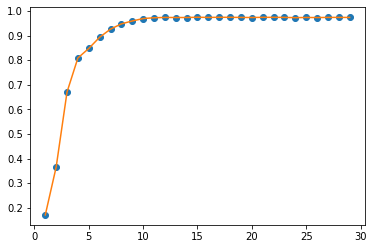

In [68]:
#1. get_maxdeoth für DecisionTree mit normalisiertem Datensatz
print('list of score for different max_depth parameters for normalized data:')
max_depth = get_maxdepth(df_data_train_norm,df_labels_train)

In [69]:
#1.Klassifikation mit Decision Tree
print('DecisionTree Algo with normalized data:')
print('\n')
res_list_dt_norm,cm_dt_norm,dt_norm = DecisionTree_Algo(df_data_train_norm,df_data_test_norm,df_labels_train,df_labels_test,15)

DecisionTree Algo with normalized data:


Training finished. Duration:
0:00:02.125919


Prediction finished. Duration:
0:00:00.005740


Model Score of training:
1.0


Model Score of unseen test data:
0.9815639564992232


Confusion Matrix of labels and predicted labels in test data:
[[834   0   0   0   0   8   0   0   2   0   0]
 [  0 846   1   1   0   0   0   0   3  26   1]
 [  0   0 876   0   4   1   0   0   0   0   0]
 [  0   0   2 876   2   0   0   4   0   0   0]
 [  0   0  12   4 860   0   0  17   0   0   0]
 [ 15   0   0   0   0 850   0   0  15   0   0]
 [  0   0   0   0   0   0 851   0   0   0   0]
 [  0   0   1   2   8   2   0 859   0   0   0]
 [  4   1   0   0   0  23   0   0 896   2   0]
 [  0  16   0   0   0   0   0   0   1 863   0]
 [  0   0   0   0   0   0   0   0   0   0 866]]


In [0]:
results.loc['Decision Tree','Runtime Training':'Score Test-Set'] = res_list_dt_norm

list of score for different max_depth parameters for normalized data without outlier:
{1: 0.17305274665209072, 2: 0.3580759770429079, 3: 0.6726974583219458, 4: 0.8129543591145122, 5: 0.8534025690079258, 6: 0.8969663842579939, 7: 0.9264279857884669, 8: 0.9492210986608363, 9: 0.9632139928942334, 10: 0.9703744192402297, 11: 0.9738726427985789, 12: 0.9761136922656464, 13: 0.9760043727794478, 14: 0.9757857338070511, 15: 0.9757857338070511, 16: 0.9755670948346543, 17: 0.9755124350915552, 18: 0.9761136922656464, 19: 0.9756217545777535, 20: 0.9752937961191581, 21: 0.9750751571467615, 22: 0.9755124350915549, 23: 0.9759497130363487, 24: 0.9751298168898608, 25: 0.9753484558622574, 26: 0.9749111779174638, 27: 0.9756217545777535, 28: 0.9749111779174638, 29: 0.9756217545777535}
Maxdepth with max score for input data:  12


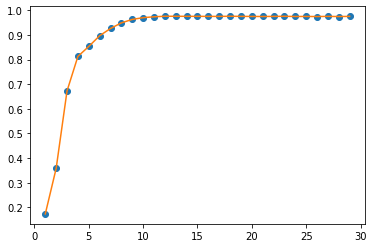

In [71]:
#2. DecisionTree mit normalisierten Daten ohne Outlier
print('list of score for different max_depth parameters for normalized data without outlier:')
max_depth_z = get_maxdepth(df_data_train_norm_z,df_labels_train_z)

In [72]:
#2. Decision Tree Klassifikation für normalisierte Daten ohne Outlier
print('DecisionTree Algo with normalized data without outlier:')
print('\n')
res_list_dt_z,cm_dt_z,dt_z = DecisionTree_Algo(df_data_train_norm_z,df_data_test_norm_z,df_labels_train_z,df_labels_test_z,max_depth_z)

DecisionTree Algo with normalized data without outlier:


Training finished. Duration:
0:00:01.947541


Prediction finished. Duration:
0:00:00.004834


Model Score of training:
0.9980321416857986


Model Score of unseen test data:
0.9808389435525634


Confusion Matrix of labels and predicted labels in test data:
[[831   0   0   0   0  13   0   0   0   0   0]
 [  0 852   0   1   0   2   0   0   3  19   1]
 [  0   0 864   0  15   0   0   2   0   0   0]
 [  0   0   2 876   5   0   0   1   0   0   0]
 [  0   0  12   3 860   0   0  18   0   0   0]
 [ 12   1   0   0   0 849   0   0  18   0   0]
 [  0   0   0   0   0   0 851   0   0   0   0]
 [  0   0   1   1  13   0   0 857   0   0   0]
 [  5   1   0   0   0  15   0   0 903   2   0]
 [  0  19   0   0   0   0   0   0   0 861   0]
 [  0   0   0   0   0   0   0   0   0   0 866]]


In [0]:
results.loc['Decision Tree','Runtime Training without Outliers':'Score Test-Set without Outliers'] = res_list_dt_z

list of score for different max_depth parameters for normalized data with pca features:
{1: 0.18214285714285713, 2: 0.3618877551020408, 3: 0.5449489795918367, 4: 0.7098979591836734, 5: 0.7506122448979591, 6: 0.7914795918367347, 7: 0.8411734693877552, 8: 0.8904591836734694, 9: 0.9096428571428572, 10: 0.929030612244898, 11: 0.952295918367347, 12: 0.9641836734693877, 13: 0.9684183673469388, 14: 0.9724489795918366, 15: 0.971938775510204, 16: 0.9729081632653062, 17: 0.9723979591836734, 18: 0.9733673469387755, 19: 0.9722959183673471, 20: 0.9721938775510204, 21: 0.9720408163265306, 22: 0.9720408163265306, 23: 0.9724489795918367, 24: 0.9726020408163265, 25: 0.9735714285714285, 26: 0.972091836734694, 27: 0.9728061224489796, 28: 0.9719897959183672, 29: 0.9722959183673471}
Maxdepth with max score for input data:  25


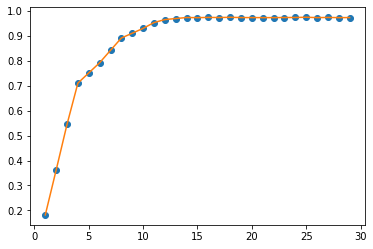

In [74]:
print('list of score for different max_depth parameters for normalized data with pca features:')
max_depth_pca = get_maxdepth(df_data_train_norm_pca,df_labels_train_pca)

In [75]:
print('DecisionTree Algo with normalized data and PCA Features:')
print('\n')
res_list_dt_pca,cm_dt_pca,dt_pca = DecisionTree_Algo(df_data_train_norm_pca,df_data_test_norm_pca,df_labels_train_pca,df_labels_test_pca,max_depth_pca)

DecisionTree Algo with normalized data and PCA Features:


Training finished. Duration:
0:00:00.914355


Prediction finished. Duration:
0:00:00.004235


Model Score of training:
1.0


Model Score of unseen test data:
0.9781460383221129


Confusion Matrix of labels and predicted labels in test data:
[[820   0   0   0   0   9   0   2  13   0   0]
 [  0 859   0   0   0   1   0   0   2  15   1]
 [  0   0 870   5   4   2   0   0   0   0   0]
 [  0   0   3 876   4   0   1   0   0   0   0]
 [  0   0  12   5 857   0   0  18   1   0   0]
 [ 19   0   3   0   1 836   0   0  21   0   0]
 [  0   0   0   1   0   0 850   0   0   0   0]
 [  1   1   0   0  19   0   0 851   0   0   0]
 [  9   2   1   0   0  15   0   0 898   1   0]
 [  0  18   0   0   0   0   0   0   1 861   0]
 [  0   0   0   0   0   0   0   0   0   0 866]]


In [0]:
results.loc['Decision Tree','Runtime Training PCA Features':'Score Test-Set PCA Features'] = res_list_dt_pca

list of score for different max_depth parameters for normalized data with 20 features:
{1: 0.17147959183673467, 2: 0.365969387755102, 3: 0.6710204081632652, 4: 0.7886734693877552, 5: 0.8324489795918367, 6: 0.8652040816326532, 7: 0.8970918367346938, 8: 0.9231122448979591, 9: 0.9404081632653062, 10: 0.9602551020408164, 11: 0.9680102040816326, 12: 0.9736224489795917, 13: 0.9781632653061225, 14: 0.9804591836734693, 15: 0.9802551020408163, 16: 0.9808163265306122, 17: 0.9803571428571429, 18: 0.9816836734693878, 19: 0.981326530612245, 20: 0.980561224489796, 21: 0.9815816326530612, 22: 0.9807142857142859, 23: 0.9811734693877551, 24: 0.9815306122448979, 25: 0.9817857142857143, 26: 0.9815816326530612, 27: 0.9804591836734693, 28: 0.980765306122449, 29: 0.9807142857142856}
Maxdepth with max score for input data:  25


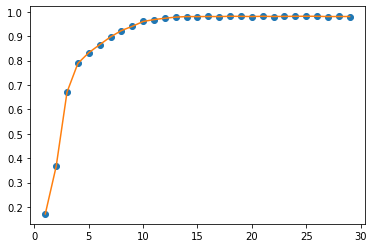

In [77]:
#3. DecisionTree mit normalisiertem Datensatz und 20 besten Features
print('list of score for different max_depth parameters for normalized data with 20 features:')
max_depth_chi = get_maxdepth(df_data_train_norm_chi,df_labels_train_chi)

In [78]:
print('DecisionTree Algo with normalized data and 20 Features:')
print('\n')
res_list_dt_chi,cm_dt_chi,dt_chi = DecisionTree_Algo(df_data_train_norm_chi,df_data_test_norm_chi,df_labels_train_chi,df_labels_test_chi,max_depth_chi)

DecisionTree Algo with normalized data and 20 Features:


Training finished. Duration:
0:00:00.964574


Prediction finished. Duration:
0:00:00.004302


Model Score of training:
1.0


Model Score of unseen test data:
0.9841532884515795


Confusion Matrix of labels and predicted labels in test data:
[[829   0   0   0   0   7   0   0   8   0   0]
 [  0 856   0   0   2   1   0   0   0  18   1]
 [  0   0 871   1   9   0   0   0   0   0   0]
 [  0   0   3 878   1   0   0   2   0   0   0]
 [  0   0   3   3 878   0   0   9   0   0   0]
 [ 15   0   0   0   0 854   0   0  11   0   0]
 [  0   0   0   0   0   0 851   0   0   0   0]
 [  0   0   1   2  13   0   0 856   0   0   0]
 [  7   1   0   0   0  15   0   0 900   3   0]
 [  0  16   1   0   0   0   0   0   0 863   0]
 [  0   0   0   0   0   0   0   0   0   0 866]]


In [0]:
results.loc['Decision Tree','Runtime Training KBest Features':'Score Test-Set KBest Features'] = res_list_dt_chi

**Fazit:**

- Mit normalisiertem Datensatz ohne Outlier kann im Training ein Ergebnis von 1.0 erzielt werden.
- Im Test auf die ungesehenen Daten schneidet jedoch der KBest Datensatz besser ab, der vorher ein schlechteres Ergebnisse hatte im Training.

- Ein gutes Beispiel dafür, dass zu viele Feature zu Overfitting führen können. Mit weniger Features, kann im Test ein besseres Ergebnis erzielt werden.

In [80]:
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [81]:
dotfile = StringIO()
export_graphviz(dt_norm, out_file=dotfile,feature_names=df_data.columns)
pydotplus.graph_from_dot_data(dotfile.getvalue()).write_png("dtree_norm.png")

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.677774 to fit



True

In [82]:
dotfile = StringIO()
export_graphviz(dt_z, out_file=dotfile)
pydotplus.graph_from_dot_data(dotfile.getvalue()).write_png("dtree_z.png")

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.780557 to fit



True

In [83]:
dotfile = StringIO()
export_graphviz(dt_chi, out_file=dotfile)
pydotplus.graph_from_dot_data(dotfile.getvalue()).write_png("dtree_chi.png")

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.830322 to fit



True

##### 4.4.2 Random Forrest

Der Random Forrest ist ein Klassifikator, der aus mehreren einzelnen Decision Trees zusammengeführt wird. Hierfür wird der Datensatz in verschiedene, zufällige Samples unterteilt und durch diverse Decision Trees klassifiziert. Das Ergebnis aller Bäume wird zu einem Random Forrest Ergebnis zusammengeführt.

In [0]:
from sklearn.ensemble import RandomForestClassifier as RandomForest
from sklearn.model_selection import GridSearchCV


def grid_params_rf(train_data,train_labels):
    estimator = RandomForest()
    param_grid = { 
            "n_estimators"      : range(10,34,3),
            "bootstrap": [True, False],
            }
    cv = ShuffleSplit(n_splits=5, test_size=0.4, random_state=110)
    grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=cv)

    grid.fit(train_data,train_labels)

    return grid.best_score_ , grid.best_params_


def RandomForrest_Algo(train_data,test_data,train_labels,test_labels,max_depth,n_estimators):
    """  
    Initialization, training and test of Random Forrest Classification.
    Default Value max_depth=3 and n_estimators=10
    """
    #Initialisiere RandomForrest Klassifikators
    rf = RandomForest(n_estimators=n_estimators,criterion='entropy',max_depth=max_depth,min_samples_split=2,min_samples_leaf=1,random_state=110,bootstrap=False)
  
    #Starte Training
    start = timer() #Stoppe Trainingszeit
    rf.fit(train_data,train_labels)
    end = timer() #Ende Training
  
    print("Training finished. Duration:")
    train_duration = timedelta(seconds=end-start)
    print(train_duration)
    print("\n")
  
    # Test des Models auf Trainingsdaten
    start = timer() #Stoppe Trainingszeit
    y_pred = rf.predict(train_data)
    end = timer() #Ende Training
    test_duration = timedelta(seconds=end-start)
    y_pred_test = rf.predict(test_data)
  
    #Predict the response for test dataset
    print("Model Score of training data:")
    train_score = rf.score(train_data, train_labels)
    print(train_score)
    print("\n")

    #Predict the response for an unseen dataset
    print("Model Score of unseen test data:")
    test_score = rf.score(test_data, test_labels)
    print(test_score)
    print("\n")
   
    #Print Confusion Matrix for training dataset
    print("Confusion Matrix of test labels und predicted for training data:")
    cm = confusion_matrix(test_labels, y_pred_test)
    print(cm)
    
    res_list = [train_duration,test_duration,train_score,test_score]
  
    return res_list,cm,rf

In [85]:
score_rf_norm,params_rf_norm = grid_params_rf(df_data_train_norm,df_labels_train)

print(score_rf_norm)

print(params_rf_norm)

0.9959183673469387
{'bootstrap': False, 'n_estimators': 22}


In [0]:
pl_norm = list(params_rf_norm.values())
bootstrap_norm = pl_norm[0]
n_estimators_norm = pl_norm[1]

In [87]:
#1. RandomForrest Klassifikation für normalisierte Daten
print('Random Forrest with normalized data:')
print('\n')
res_list_rf_norm,cm_rf_norm,rf = RandomForrest_Algo(df_data_train_norm,df_data_test_norm,df_labels_train,df_labels_test,max_depth,n_estimators_norm)

Random Forrest with normalized data:


Training finished. Duration:
0:00:07.801740


Model Score of training data:
1.0


Model Score of unseen test data:
0.9982392542723977


Confusion Matrix of test labels und predicted for training data:
[[843   0   0   0   0   1   0   0   0   0   0]
 [  0 874   0   0   0   0   0   0   1   2   1]
 [  0   0 880   0   1   0   0   0   0   0   0]
 [  0   0   0 884   0   0   0   0   0   0   0]
 [  0   0   1   1 890   0   0   1   0   0   0]
 [  0   0   0   0   0 879   0   0   1   0   0]
 [  0   0   0   0   0   0 851   0   0   0   0]
 [  0   0   0   0   0   0   0 872   0   0   0]
 [  1   0   0   0   0   1   0   0 921   3   0]
 [  0   2   0   0   0   0   0   0   0 878   0]
 [  0   0   0   0   0   0   0   0   0   0 866]]


In [0]:
results.loc['Random Forrest','Runtime Training':'Score Test-Set'] = res_list_rf_norm

In [89]:
score_z,params_z = grid_params_rf(df_data_train_norm_z,df_labels_train_z)

print(score_z)

print(params_z)

pl_z = list(params_z.values())
n_estimators_z = pl_z[1]

0.99655643618475
{'bootstrap': False, 'n_estimators': 28}


In [90]:
#2. RandomForrest Klassifikation für normalisierte Daten ohne Outlier
print('RandomForrest Algo with normalized data and without outlier:')
print('\n')
res_list_rf_z,cm_rf_z,rf_z = RandomForrest_Algo(df_data_train_norm_z,df_data_test_norm_z,df_labels_train_z,df_labels_test_z,max_depth_z,n_estimators_z)

RandomForrest Algo with normalized data and without outlier:


Training finished. Duration:
0:00:08.708004


Model Score of training data:
0.99994533726905


Model Score of unseen test data:
0.9969963749352667


Confusion Matrix of test labels und predicted for training data:
[[842   0   0   0   0   2   0   0   0   0   0]
 [  0 870   0   0   0   0   0   0   1   6   1]
 [  0   0 879   0   2   0   0   0   0   0   0]
 [  0   0   0 884   0   0   0   0   0   0   0]
 [  0   0   3   1 886   0   0   3   0   0   0]
 [  1   0   0   0   0 878   0   0   1   0   0]
 [  0   0   0   0   0   0 851   0   0   0   0]
 [  0   0   0   0   1   0   0 871   0   0   0]
 [  1   1   0   0   0   0   0   0 922   2   0]
 [  0   3   0   0   0   0   0   0   0 877   0]
 [  0   0   0   0   0   0   0   0   0   0 866]]


In [0]:
results.loc['Random Forrest','Runtime Training without Outliers':'Score Test-Set without Outliers'] = res_list_rf_z

In [92]:
score_pca,params_pca = grid_params_rf(df_data_train_norm_pca,df_labels_train_pca)

print(score_pca)

print(params_pca)

pl_pca = list(params_pca.values())
n_estimators_pca = pl_pca[1]

0.9857908163265307
{'bootstrap': False, 'n_estimators': 25}


In [93]:
print('RandomForrest Algo with normalized data and PCA Features:')
print('\n')
res_list_rf_pca,cm_rf_pca,rf_pca = RandomForrest_Algo(df_data_train_norm_pca,df_data_test_norm_pca,df_labels_train_pca,df_labels_test_pca,max_depth_pca,n_estimators_pca)

RandomForrest Algo with normalized data and PCA Features:


Training finished. Duration:
0:00:07.547263


Model Score of training data:
1.0


Model Score of unseen test data:
0.9923355774210254


Confusion Matrix of test labels und predicted for training data:
[[838   0   0   0   0   3   0   0   3   0   0]
 [  0 865   0   0   0   0   0   0   1  11   1]
 [  0   0 879   0   2   0   0   0   0   0   0]
 [  0   0   2 880   2   0   0   0   0   0   0]
 [  0   0   6   0 879   0   0   8   0   0   0]
 [  4   0   0   0   0 870   0   0   6   0   0]
 [  0   0   0   0   0   0 851   0   0   0   0]
 [  0   0   0   0   7   0   0 865   0   0   0]
 [  1   2   1   0   0   8   0   0 913   1   0]
 [  0   5   0   0   0   0   0   0   0 875   0]
 [  0   0   0   0   0   0   0   0   0   0 866]]


In [0]:
results.loc['Random Forrest','Runtime Training PCA Features':'Score Test-Set PCA Features'] = res_list_rf_pca

In [95]:
score_chi,params_chi = grid_params_rf(df_data_train_norm_chi,df_labels_train_chi)

print(score_chi)

print(params_chi)

pl_chi = list(params_chi.values())
n_estimators_chi = pl_chi[1]

0.9949489795918367
{'bootstrap': False, 'n_estimators': 31}


In [96]:
print('RandomForrest Algo mit normalisierten Daten und KBest Features:')
print('\n')
res_list_rf_chi,cm_rf_chi,rf_chi = RandomForrest_Algo(df_data_train_norm_chi,df_data_test_norm_chi,df_labels_train_chi,df_labels_test_chi,max_depth_chi,n_estimators_chi)

RandomForrest Algo mit normalisierten Daten und KBest Features:


Training finished. Duration:
0:00:06.574279


Model Score of training data:
1.0


Model Score of unseen test data:
0.9967892283790782


Confusion Matrix of test labels und predicted for training data:
[[839   0   0   0   0   0   0   0   5   0   0]
 [  0 869   0   0   2   0   0   0   1   5   1]
 [  0   0 881   0   0   0   0   0   0   0   0]
 [  0   0   1 883   0   0   0   0   0   0   0]
 [  0   0   1   2 889   0   0   1   0   0   0]
 [  1   0   0   0   0 879   0   0   0   0   0]
 [  0   0   0   0   0   0 851   0   0   0   0]
 [  0   0   0   0   1   0   0 871   0   0   0]
 [  3   1   0   0   0   2   0   0 917   3   0]
 [  0   1   0   0   0   0   0   0   0 879   0]
 [  0   0   0   0   0   0   0   0   0   0 866]]


In [0]:
results.loc['Random Forrest','Runtime Training KBest Features':'Score Test-Set KBest Features'] = res_list_rf_chi

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

def rf_cross_val(features,labels,splits,max_depth,n_estimators):
    """
    Random Forrest Classification with Cross Validation
    """
    #Initialisiere RandomForrest Klassifikators
    random_forest = RandomForest(n_estimators=n_estimators,criterion='entropy',max_depth=max_depth,min_samples_split=2,min_samples_leaf=1,random_state=110,bootstrap=False)
  
    cv = ShuffleSplit(n_splits=splits, test_size=0.2, random_state=110)

    scores = cross_val_score(random_forest,features,labels,cv=cv)

    #print("Die durchschnittle Genauigkeit mit {0} Splits für die Cross Validation beträgt {1}".format(splits,scores.mean())
    return random_forest,scores

In [0]:
rf_kf,score = rf_cross_val(df_data_norm,df_labels,3,23,20)

In [100]:
score.mean()

0.9984618014014699

In [101]:
results

,Runtime Training,Runtime Prediction,Score Trainings-Set,Score Test-Set,Runtime Training without Outliers,Runtime Prediction without Outliers,Score Trainings-Set without Outliers,Score Test-Set without Outliers,Runtime Training PCA Features,Runtime Prediction PCA Features,Score Trainings-Set PCA Features,Score Test-Set PCA Features,Runtime Training KBest Features,Runtime Prediction KBest Features,Score Trainings-Set KBest Features,Score Test-Set KBest Features
1-NN,0:00:00.053410,0:00:00.955113,1,0.975142,0:00:00.046426,0:00:00.927025,1,0.975867,0:00:00.025105,0:00:00.765180,1,0.980735,0:00:00.035764,0:00:00.786717,1,0.998343
K-NN,0:00:00.056642,0:00:09.869611,0.989286,0.979803,0:00:00.043800,0:00:03.761823,0.994643,0.978767,0:00:00.020597,0:00:01.491627,0.994133,0.98146,0:00:00.033750,0:00:01.119489,0.998929,0.997618
Bayes,0:00:00.033778,0:00:00.179122,0.705918,0.698809,0:00:00.020578,0:00:00.167061,0.859079,0.854065,0:00:00.016644,0:00:00.026949,0.78051,0.77276,0:00:00.018869,0:00:00.030698,0.827092,0.826411
Decision Tree,0:00:02.125919,0:00:00.005740,1,0.981564,0:00:01.947541,0:00:00.004834,0.998032,0.980839,0:00:00.914355,0:00:00.004235,1,0.978146,0:00:00.964574,0:00:00.004302,1,0.984153
Random Forrest,0:00:07.801740,0:00:00.325690,1,0.998239,0:00:08.708004,0:00:00.341515,0.999945,0.996996,0:00:07.547263,0:00:00.344194,1,0.992336,0:00:06.574279,0:00:00.403455,1,0.996789
SVM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ANN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 4.5 Support Vector Machines

In [0]:
from sklearn import svm
def SVM_Algo(df_train,df_test,df_labels_train,df_labels_test,C,gamma):
    """
    Suppor Vector Machines Classification Algorithm.
    Input of parameters C and Gamma is necessary.
    Standard Kernel ist RBF.
    
    """
    #Initialisiere SVM Klassifikator
    svm_ = svm.SVC(kernel='rbf', C = C, gamma=gamma)
    
    #Starte Training
    start = timer() #Stoppe Trainingszeit
    svm_.fit(df_train,df_labels_train)
    end = timer() #Ende Training
    train_duration = timedelta(seconds=end-start)
    print("Training finished. Duration:")
    print(train_duration)
    print("\n")
    
    # Test des Models auf Trainingsdaten
    start = timer() #Stoppe Zeit fuer Prediction
    y_pred = svm_.predict(df_train)
    end = timer() #Ende Prediction
    y_pred_test = svm_.predict(df_test)
      
    test_duration = timedelta(seconds=end-start)
    print("Prediction finished. Duration:")
    print(test_duration)
    print("\n")
    
    #Predict the response for training dataset
    print("Model Score of training:")
    train_score = svm_.score(df_train, df_labels_train)
    print(train_score)
    print("\n")
  
    #Predict the response for test dataset
    print("Model Score of unseen test data:")
    test_score = svm_.score(df_test, df_labels_test)
    print(test_score)
    print("\n")
    
    #Print Confusion Matrix for training dataset
    print("Confusion Matrix of labels and predicted labels for test data:")
    cm = confusion_matrix(df_labels_test, y_pred_test)
    print(cm)
    
    res_list = [train_duration,test_duration,train_score,test_score]

    return res_list,cm,svm_  

In [0]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

def get_best_svm_params(train_data,train_labels):
    start = timer() #Stoppe Trainingszeit

    C_range = [1,10,100,1000]
    gamma_range  = [0.1,1,10,50,100]
    param_grid = dict(gamma=gamma_range, C=C_range)
    cv = ShuffleSplit(n_splits=5, test_size=0.4, random_state=110)
    grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv,refit=False)
    grid.fit(train_data, train_labels)
  
    print("The best parameters are %s with a score of %0.2f"% (grid.best_params_, grid.best_score_))

    end = timer()
    print("Duration:")
    print(timedelta(seconds=end-start))
    print("\n")
    return grid.best_params_['C'],grid.best_params_['gamma']

In [104]:
best_C_norm,best_gamma_norm = get_best_svm_params(df_data_train_norm,df_labels_train)

The best parameters are {'C': 10, 'gamma': 10} with a score of 0.99
Duration:
0:25:35.139297




In [105]:
#1. Support Vector Machine Klassifikation für normalisierte Daten
print('Support Vector Machine with normalized data:')
print('\n')
res_list_svm_norm,cm_svm_norm,svm_norm = SVM_Algo(df_data_train_norm,df_data_test_norm,df_labels_train,df_labels_test,best_C_norm,best_gamma_norm)

Support Vector Machine with normalized data:


Training finished. Duration:
0:00:07.757429


Prediction finished. Duration:
0:00:07.853223


Model Score of training:
0.9998469387755102


Model Score of unseen test data:
0.9938891765924391


Confusion Matrix of labels and predicted labels for test data:
[[834   0   0   0   0   7   0   0   3   0   0]
 [  0 871   0   0   0   0   0   0   1   4   2]
 [  0   0 879   0   1   0   0   0   1   0   0]
 [  0   0   2 879   2   0   0   1   0   0   0]
 [  0   0   3   1 882   0   0   6   0   0   1]
 [  2   0   0   0   0 873   0   1   4   0   0]
 [  0   0   0   0   0   0 850   0   0   0   1]
 [  0   0   0   0   0   3   0 869   0   0   0]
 [  0   0   0   0   0   7   0   0 917   2   0]
 [  0   4   0   0   0   0   0   0   0 876   0]
 [  0   0   0   0   0   0   0   0   0   0 866]]


In [0]:
results.loc['SVM','Runtime Training':'Score Test-Set'] = res_list_svm_norm

In [107]:
best_C_z,best_gamma_z = get_best_svm_params(df_data_train_norm_z,df_labels_train_z)

The best parameters are {'C': 100, 'gamma': 10} with a score of 1.00
Duration:
0:21:21.404238




In [108]:
#2. Support Vector Machine Klassifikation für normalisierte Daten ohne Outlier
print('Support Vector Machine with normalized data without Outliers:')
print('\n')
res_list_svm_z,cm_svm_z,svm_z = SVM_Algo(df_data_train_norm_z,df_data_test_norm_z,df_labels_train_z,df_labels_test_z,best_C_z,best_gamma_z)

Support Vector Machine with normalized data without Outliers:


Training finished. Duration:
0:00:05.046071


Prediction finished. Duration:
0:00:06.542725


Model Score of training:
1.0


Model Score of unseen test data:
0.9907819782496116


Confusion Matrix of labels and predicted labels for test data:
[[828   0   0   0   1   4   0   0  11   0   0]
 [  0 870   0   0   0   0   0   0   6   2   0]
 [  0   0 873   0   5   0   0   0   3   0   0]
 [  0   0   1 876   1   0   0   1   5   0   0]
 [  0   0   0   1 885   0   0   5   2   0   0]
 [  7   0   0   0   1 858   0   0  14   0   0]
 [  0   0   0   0   0   0 849   0   2   0   0]
 [  0   0   0   0   2   0   0 865   5   0   0]
 [  0   0   0   0   0   4   0   0 920   2   0]
 [  0   3   0   0   0   0   0   0   1 876   0]
 [  0   0   0   0   0   0   0   0   0   0 866]]


In [0]:
results.loc['SVM','Runtime Training without Outliers':'Score Test-Set without Outliers'] = res_list_svm_z

In [110]:
#SVM fuer Datensatz mit PCA Komponenten
best_C_pca,best_gamma_pca = get_best_svm_params(df_data_train_norm_pca,df_labels_train_pca)

The best parameters are {'C': 10, 'gamma': 10} with a score of 0.99
Duration:
0:14:13.268438




In [111]:
#2. Support Vector Machine Klassifikation für normalisierte Daten ohne Outlier
print('Support Vector Machine with PCA Features:')
print('\n')
res_list_svm_pca,cm_svm_pca,svm_pca = SVM_Algo(df_data_train_norm_pca,df_data_test_norm_pca,df_labels_train_pca,df_labels_test_pca,best_C_pca,best_gamma_pca)

Support Vector Machine with PCA Features:


Training finished. Duration:
0:00:04.121934


Prediction finished. Duration:
0:00:03.771420


Model Score of training:
0.9995918367346939


Model Score of unseen test data:
0.9952356292076644


Confusion Matrix of labels and predicted labels for test data:
[[834   0   0   0   0   7   0   0   3   0   0]
 [  0 872   0   0   0   0   0   0   3   3   0]
 [  0   0 879   0   1   0   0   0   1   0   0]
 [  0   0   1 883   0   0   0   0   0   0   0]
 [  0   0   2   1 885   0   0   4   1   0   0]
 [  0   0   0   0   0 877   0   0   3   0   0]
 [  0   0   0   0   0   0 850   0   1   0   0]
 [  0   0   0   1   0   1   0 870   0   0   0]
 [  0   0   0   0   0   9   0   0 915   2   0]
 [  0   2   0   0   0   0   0   0   0 878   0]
 [  0   0   0   0   0   0   0   0   0   0 866]]


In [0]:
results.loc['SVM','Runtime Training PCA Features':'Score Test-Set PCA Features'] = res_list_svm_pca

In [113]:
best_C_chi,best_gamma_chi = get_best_svm_params(df_data_train_norm_chi,df_labels_train_chi)

The best parameters are {'C': 10, 'gamma': 50} with a score of 1.00
Duration:
0:06:21.097387




In [114]:
#3. Support Vector Machine Klassifikation für normalisierte Daten und KBest Features
print('Support Vector Machine with normalized data and KBest Features:')
print('\n')
res_list_svm_chi,cm_svm_chi,svm_chi = SVM_Algo(df_data_train_norm_chi,df_data_test_norm_chi,df_labels_train_chi,df_labels_test_chi,best_C_chi,best_gamma_chi)

Support Vector Machine with normalized data and KBest Features:


Training finished. Duration:
0:00:05.749654


Prediction finished. Duration:
0:00:02.577181


Model Score of training:
0.9999489795918367


Model Score of unseen test data:
0.999171413775246


Confusion Matrix of labels and predicted labels for test data:
[[842   0   0   0   0   1   0   0   1   0   0]
 [  0 876   0   0   0   0   0   0   2   0   0]
 [  0   0 881   0   0   0   0   0   0   0   0]
 [  0   0   0 884   0   0   0   0   0   0   0]
 [  0   0   0   0 893   0   0   0   0   0   0]
 [  1   0   0   0   0 879   0   0   0   0   0]
 [  0   0   0   0   0   0 851   0   0   0   0]
 [  0   0   0   0   0   0   0 872   0   0   0]
 [  0   0   0   0   0   1   0   0 923   2   0]
 [  0   0   0   0   0   0   0   0   0 880   0]
 [  0   0   0   0   0   0   0   0   0   0 866]]


In [0]:
results.loc['SVM','Runtime Training KBest Features':'Score Test-Set KBest Features'] = res_list_svm_chi

### 5. Artificial Neural Network

In [116]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

In [0]:
def encoder(labels):
    encoder = preprocessing.LabelEncoder()
    encoder.fit(labels)
    
    labels_enc = encoder.transform(labels)
    labels_one = keras.utils.to_categorical(labels_enc)

    return labels_one

labels_onehot = encoder(df_labels)

train_data,test_data,train_labels,test_labels = train_test_split(df_data_norm,labels_onehot,test_size=0.2)


In [118]:
#Framework for ANN
model = keras.Sequential([
    keras.layers.Dense(input_dim=48,units=100,activation='relu'),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(16,activation='relu'),
    keras.layers.Dense(11, activation='softmax')
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
#Stochastic Gradient Descent as optimization function
sgd = keras.optimizers.SGD(lr=0.05,momentum=0.6)

model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

In [120]:
#Train ANN

start = timer() #Stoppe Trainingszeit    
model.fit(x=train_data,y=train_labels,batch_size=70,epochs=800)
end = timer() #Ende Training
train_duration_ann = timedelta(seconds=end-start)
print("Training finished. Duration:")
print(train_duration_ann)
print("\n")

Train on 23404 samples
Epoch 1/800
23404/23404 [==============================] - 2s 83us/sample - loss: 2.1698 - acc: 0.2050
Epoch 2/800
23404/23404 [==============================] - 1s 53us/sample - loss: 1.5515 - acc: 0.3900
Epoch 3/800
23404/23404 [==============================] - 1s 53us/sample - loss: 1.1840 - acc: 0.5065
Epoch 4/800
23404/23404 [==============================] - 1s 52us/sample - loss: 1.0767 - acc: 0.5429
Epoch 5/800
23404/23404 [==============================] - 1s 53us/sample - loss: 0.9747 - acc: 0.5931
Epoch 6/800
23404/23404 [==============================] - 1s 52us/sample - loss: 0.7700 - acc: 0.6798
Epoch 7/800
23404/23404 [==============================] - 1s 53us/sample - loss: 0.6030 - acc: 0.7441
Epoch 8/800
23404/23404 [==============================] - 1s 52us/sample - loss: 0.5282 - acc: 0.7768
Epoch 9/800
23404/23404 [==============================] - 1s 54us/sample - loss: 0.4855 - acc: 0.7950
Epoch 10/800
23404/23404 [========================

In [121]:
resultsTrainAnn = model.evaluate(x=train_data,y=train_labels)

result_train_ann = {}
for name,result in zip(model.metrics_names,resultsTrainAnn):
    result_train_ann[name] = result

23404/23404 [==============================] - 2s 80us/sample - loss: 0.0084 - acc: 0.9973


In [122]:
start = timer()
resultsAnn = model.evaluate(x=test_data,y=test_labels)
end = timer()
test_duration_ann = timedelta(seconds = end-start)
print("Test Duration for ANN: ",test_duration_ann)

result_test_ann = {}
for name,result in zip(model.metrics_names,resultsAnn):
    result_test_ann[name] = result

5851/5851 [==============================] - 0s 75us/sample - loss: 0.0435 - acc: 0.9932
Test Duration for ANN:  0:00:00.446194


In [0]:
# Protokolliere Ergebnisse des Neuronalen Netzes
results.loc['ANN','Runtime Training':'Score Test-Set'] = train_duration_ann,test_duration_ann,result_train_ann['acc'],result_test_ann['acc']

### 6 Auswertung der Ergebnisse

Im Folgenden Kapitel erfolgt eine Übersicht über alle gesammelten Ergebnisse der Klassifikationsverfahren.
Die am Anfang initialiserte Tabelle ist komplett befüllt und die Ergebnisse können mit einander verglichen werden. Außerdem werden die Ergebnisse in einer weiteren Datei gesichert.

Auch hier kommen wieder Methoden der Visualisierung für die Scores und Laufzeiten zum Einsatz. Diese bilden die Basis zu Bewertung der Klassifikatoren

In [124]:
results

,Runtime Training,Runtime Prediction,Score Trainings-Set,Score Test-Set,Runtime Training without Outliers,Runtime Prediction without Outliers,Score Trainings-Set without Outliers,Score Test-Set without Outliers,Runtime Training PCA Features,Runtime Prediction PCA Features,Score Trainings-Set PCA Features,Score Test-Set PCA Features,Runtime Training KBest Features,Runtime Prediction KBest Features,Score Trainings-Set KBest Features,Score Test-Set KBest Features
1-NN,0:00:00.053410,0:00:00.955113,1,0.975142,0:00:00.046426,0:00:00.927025,1,0.975867,0:00:00.025105,0:00:00.765180,1,0.980735,0:00:00.035764,0:00:00.786717,1,0.998343
K-NN,0:00:00.056642,0:00:09.869611,0.989286,0.979803,0:00:00.043800,0:00:03.761823,0.994643,0.978767,0:00:00.020597,0:00:01.491627,0.994133,0.98146,0:00:00.033750,0:00:01.119489,0.998929,0.997618
Bayes,0:00:00.033778,0:00:00.179122,0.705918,0.698809,0:00:00.020578,0:00:00.167061,0.859079,0.854065,0:00:00.016644,0:00:00.026949,0.78051,0.77276,0:00:00.018869,0:00:00.030698,0.827092,0.826411
Decision Tree,0:00:02.125919,0:00:00.005740,1,0.981564,0:00:01.947541,0:00:00.004834,0.998032,0.980839,0:00:00.914355,0:00:00.004235,1,0.978146,0:00:00.964574,0:00:00.004302,1,0.984153
Random Forrest,0:00:07.801740,0:00:00.325690,1,0.998239,0:00:08.708004,0:00:00.341515,0.999945,0.996996,0:00:07.547263,0:00:00.344194,1,0.992336,0:00:06.574279,0:00:00.403455,1,0.996789
SVM,0:00:07.757429,0:00:07.853223,0.999847,0.993889,0:00:05.046071,0:00:06.542725,1,0.990782,0:00:04.121934,0:00:03.771420,0.999592,0.995236,0:00:05.749654,0:00:02.577181,0.999949,0.999171
ANN,0:16:30.863396,0:00:00.446194,0.997265,0.993164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
#Schreibe Ergebnisse in eine csv Datei
results.to_csv(path_or_buf='results_table.csv',encoding='utf-8')

In [0]:
#Mache aus dem Index eine Spalte
#Dient zur Vorbereitung für die Visualisierung
results['Classifier'] = results.index

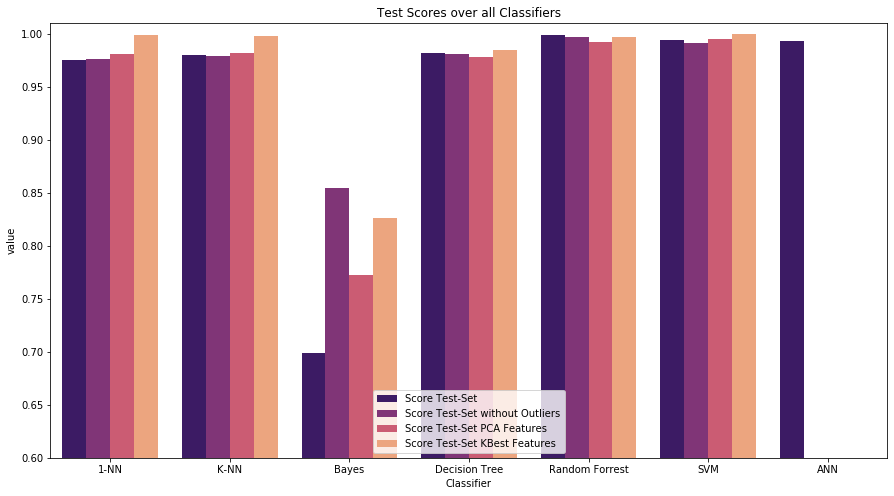

In [150]:
#Visualisierung der Scores in einem Bar-Chart für jeden Klassifikator und für jeden jeweils verwendeten Datensatz
plot_res = pd.melt(results, id_vars=['Classifier'], value_vars=['Score Test-Set', 'Score Test-Set without Outliers','Score Test-Set PCA Features','Score Test-Set KBest Features'])

#Ansicht über alle Classifier. Start bei 0.6 Score bis 1.0
plt.figure(figsize=(15,8))
plt.ylim(0.6,1.01)
sns.barplot(x=plot_res['Classifier'],y=plot_res['value'],hue=plot_res['variable'],palette='magma')
plt.legend(loc='lower center')
plt.title('Test Scores over all Classifiers')
plt.savefig('result_bar_plot_all.png')

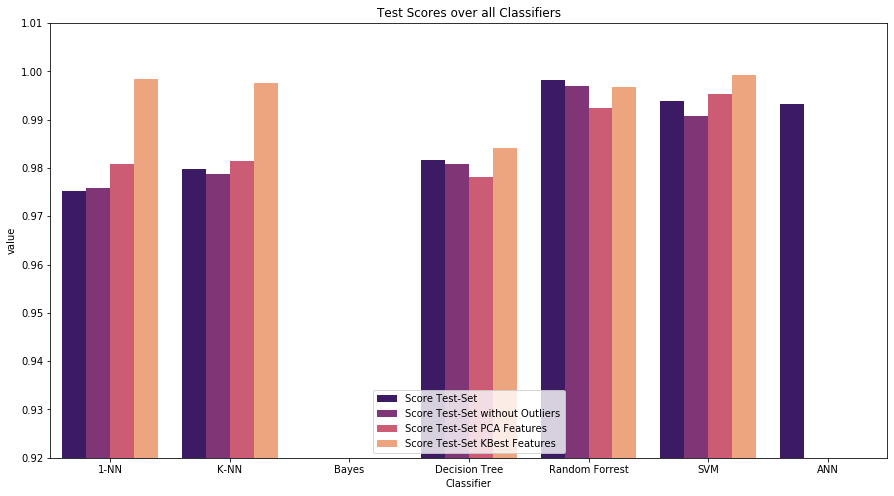

In [149]:
#Reinzoomen in die Graphik, da die Bereiche nah bei einander liegen
plt.figure(figsize=(15,8))
plt.ylim(0.92,1.01)
sns.barplot(x=plot_res['Classifier'],y=plot_res['value'],hue=plot_res['variable'],palette='magma')
plt.legend(loc='lower center')
plt.title('Test Scores over all Classifiers')
plt.savefig('result_bar_plot_detail.png')

In [129]:
results.columns

Index(['Runtime Training', 'Runtime Prediction', 'Score Trainings-Set',
       'Score Test-Set', 'Runtime Training without Outliers',
       'Runtime Prediction without Outliers',
       'Score Trainings-Set without Outliers',
       'Score Test-Set without Outliers', 'Runtime Training PCA Features',
       'Runtime Prediction PCA Features', 'Score Trainings-Set PCA Features',
       'Score Test-Set PCA Features', 'Runtime Training KBest Features',
       'Runtime Prediction KBest Features',
       'Score Trainings-Set KBest Features', 'Score Test-Set KBest Features',
       'Classifier'],
      dtype='object')

In [0]:
#Vorbereitung für die Visualisierung der Trainingszeiten für die Klassifikatoren je Datensatz
res = results.iloc[results.index != 'ANN'] #Ohne ANN da dieser Ausreißer bei Laufzeit und Verzerrt Grafik
plot_time = pd.melt(res, id_vars=['Classifier'], value_vars=['Runtime Training', 'Runtime Training without Outliers','Runtime Training PCA Features','Runtime Training KBest Features'])

In [131]:
plot_time['second'] = plot_time['value'].dt.total_seconds() #wandle Timedelta in Sekunden um
plot_time

,Classifier,variable,value,second
0,1-NN,Runtime Training,00:00:00.053410,0.053410
1,K-NN,Runtime Training,00:00:00.056642,0.056642
2,Bayes,Runtime Training,00:00:00.033778,0.033778
3,Decision Tree,Runtime Training,00:00:02.125919,2.125919
4,Random Forrest,Runtime Training,00:00:07.801740,7.801740
5,SVM,Runtime Training,00:00:07.757429,7.757429
6,1-NN,Runtime Training without Outliers,00:00:00.046426,0.046426
7,K-NN,Runtime Training without Outliers,00:00:00.043800,0.043800
8,Bayes,Runtime Training without Outliers,00:00:00.020578,0.020578
9,Decision Tree,Runtime Training without Outliers,00:00:01.947541,1.947541


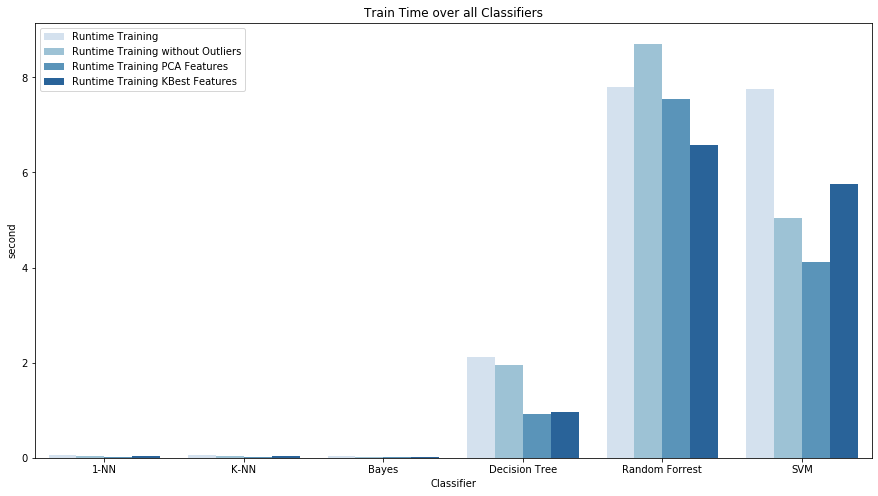

In [132]:
#Visualisiere Laufzeiten in einem Bar-Plot
# ANN wurde nicht mit aufgenommen, da deutlich länger als die anderen. Würde die Graphik verzerren.
plt.figure(figsize=(15,8))
sns.barplot(x=plot_time['Classifier'],y=plot_time['second'],hue=plot_time['variable'],palette='Blues')
plt.legend(loc='upper left')
plt.title('Train Time over all Classifiers')
plt.savefig('time_bar_plot_all.png')

In [0]:
#Funktion um Transposed Confusion matrices in ein csv zu laden. Für ML-ModelExplorer
def writeToCSV(filename, confMatrices, in_labels_crisp, transposed = False):
    
    labels = np.unique(in_labels_crisp)
    header = ','.join(map(str, labels))

    cm_first = confMatrices[0]
    print(cm_first.shape)

    if(transposed):
        cm_first = cm_first.T
    
    cm_all = cm_first
    
    for i in range(1,len(confMatrices)):
        cm = confMatrices[i]
        
        if(transposed):
            cm = cm.T
    
        print(cm.shape)
        print(cm_all.shape)

        cm_all = np.append(cm_all, cm, axis=0)
    
    cm_orientation = ""
    if(transposed):
        cm_orientation = "_labels_in_columns" 
    else:
        cm_orientation = "_labels_in_rows"
    
    createdFilename = filename + cm_orientation + ".csv"
    np.savetxt(createdFilename, cm_all, header = header, comments = "", delimiter=",", fmt="%d")

In [153]:
#Hier werden nur die Chi CMs verwendet, damit alles überschaubar bleibt.
#Diese werden transposed in ein csv geladen.
confusion_matrix_list = [cm_onn_chi,cm_knn_chi,cm_gnb_chi,cm_dt_chi,cm_rf_chi,cm_svm_chi]
writeToCSV(filename='chi_cm',confMatrices=confusion_matrix_list,in_labels_crisp=[1,2,3,4,5,6,7,8,9,10,11],transposed=True)

(11, 11)
(11, 11)
(11, 11)
(11, 11)
(22, 11)
(11, 11)
(33, 11)
(11, 11)
(44, 11)
(11, 11)
(55, 11)


**Ausblick: Betrachtung von Klassifikatoren im Ensemble**
Man sollte einzelne Klassifikatoren nicht nur einzeln betrachten.
Eine Möglichkeit wäre verschiedene Klassifikatoren, die für die Fehlerklassen unterschiedlich gut performen. Anbei ein Bespiel bezüglich der KNN und Random Forest Klassifikatoren mit den KBest Features. 


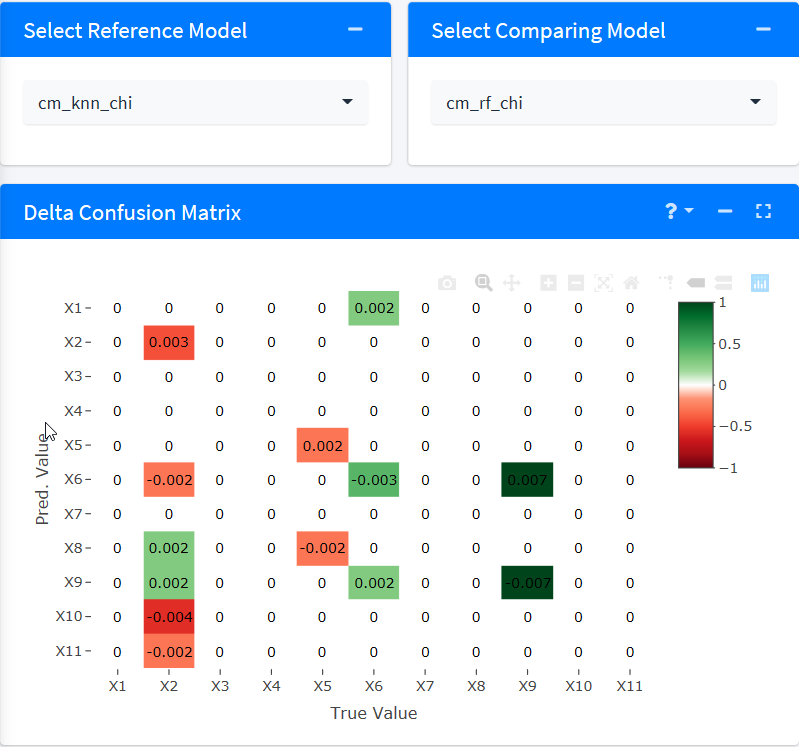



In [0]:
from sklearn.ensemble import VotingClassifier

estimators=[('knn', knn_chi), ('rf', rf_chi)]
#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='soft')

#fit model to training data
ensemble.fit(df_data_train_norm_chi, df_labels_train_chi)
#test our model on the test data
ens_score = ensemble.score(df_data_test_norm_chi, df_labels_test_chi)

In [136]:
print('Test Score of KNN Classifier:', res_list_knn_chi[-1])
print('Test Score of RF Classifier:', res_list_rf_chi[-1])
print('-----------')
print('Test Score of KNN and RF Ensemble:', ens_score)

Test Score of KNN Classifier: 0.9976178146038323
Test Score of RF Classifier: 0.9967892283790782
-----------
Test Score of KNN and RF Ensemble: 0.998342827550492


### Abschließende Validierung einem Blind Test Set

Die Daten in diesem Testset sind völlig unbekannt und wurden weder in Training, noch in der Evaluierungsphase verwendet.
Hiermit ist eine abschließende Validierung der Modelle notwendig.

Da nicht immer alle Klassifikatoren verwendet werden können, wird das Augenmerk auf dem Random Forest Klassifikator liegen,
da diese Arbeit gezeigt hat, dass es sich für diesen Anwendugsfall um einen geeigneten ML Algorithmus hinsichtlich Interpretierbarkeit, Schnelligkeit und Genauigkeit handelt.


In [137]:
#Einlesen des blind test sets.
blind_test_set = pd.read_csv('dc_motor_test_set.csv')

#Aufteilung der Daten in Features und Klassenlabel
blind_test_labels = blind_test_set.pop('class')

#Wie die anderen Datensätze auch, muss der Blind Test Datensastz ebenfalls normalisiert werden. 
#Verwendet werden die gleichen Parameter.

blind_test_set_norm = pd.DataFrame(scaler.transform(blind_test_set),columns=blind_test_set.columns,index=blind_test_labels.index)

blind_test_set_norm.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48
0,0.596555,0.545580,0.644594,0.897992,0.910292,0.780635,0.770564,0.770443,0.770561,0.700778,0.693698,0.698672,0.000908,0.004276,0.015185,0.000743,0.001364,0.002336,0.668044,0.668087,0.668549,0.666720,0.666807,0.667214,0.358303,0.528819,0.580782,0.393953,0.526221,0.560762,0.391227,0.398235,0.402070,0.294882,0.312715,0.306997,0.000215,0.182351,0.137755,0.000128,0.037935,0.045566,0.397644,0.395150,0.369501,0.301408,0.313869,0.290055
1,0.594448,0.540655,0.624649,0.897182,0.904911,0.774430,0.695995,0.696091,0.697172,0.500235,0.495280,0.499047,0.022750,0.023200,0.083910,0.015172,0.017316,0.057183,0.443909,0.443937,0.443669,0.447100,0.447096,0.446780,0.358770,0.479431,0.484719,0.394668,0.541670,0.519061,0.373451,0.381305,0.386396,0.248550,0.266618,0.259403,0.000132,0.004095,0.005208,0.000068,0.015568,0.098015,0.269514,0.272468,0.243402,0.288732,0.300730,0.277624
2,0.596317,0.539017,0.642806,0.897748,0.902964,0.779303,0.746195,0.746392,0.746601,0.577017,0.571342,0.575491,0.021219,0.023229,0.049782,0.013999,0.019331,0.033515,0.355421,0.355444,0.355430,0.358768,0.358754,0.358695,0.358629,0.480097,0.523069,0.395365,0.521555,0.546683,0.430554,0.437915,0.441966,0.277480,0.295817,0.290252,0.000141,0.005972,0.022539,0.000060,0.036624,0.023458,0.319588,0.320970,0.293255,0.373239,0.388321,0.357735
3,0.596267,0.545528,0.656096,0.898326,0.912340,0.749006,0.495102,0.494884,0.494534,0.541364,0.535821,0.540704,0.022286,0.021361,0.088232,0.013521,0.017897,0.057943,0.394468,0.394429,0.394316,0.396697,0.396751,0.396273,0.357874,0.482665,0.471828,0.393557,0.535130,0.493628,0.301179,0.309441,0.312458,0.303458,0.321160,0.317095,0.000139,0.000881,0.019250,0.000068,0.011273,0.050699,0.321060,0.320970,0.297654,0.414085,0.430657,0.407459
4,0.595894,0.542316,0.639160,0.898075,0.910140,0.782203,0.242813,0.242667,0.243184,0.040393,0.039887,0.040171,0.007585,0.011184,0.036751,0.004398,0.006421,0.027723,0.554075,0.554047,0.554301,0.557069,0.557142,0.557347,0.358384,0.458521,0.500325,0.394131,0.519319,0.558001,0.277448,0.286220,0.291315,0.249340,0.267321,0.261475,0.000063,0.044437,0.051628,0.000055,0.016125,0.096385,0.372607,0.370899,0.343109,0.315493,0.328467,0.305249


In [138]:
#Check ob auch die gleichen Klassen darin enthalten sind.
blind_test_labels.unique()

array([ 4,  9,  5, 10, 11,  1,  6,  7,  8,  2,  3])

In [139]:
#Umwandlung des blind test sets bezüglich PCA und Chi², damit die Modelle getestet werden können.
#Für den Test ohne Outlier, ist keine Umwandlung nötig, da dort nur Feature Vektoren für die Modellbildung entfernt wurden.

#1. PCA Transformation auf normalisierten Datensatz
blind_test_set_norm_pca = pd.DataFrame(pca99.transform(blind_test_set_norm),index=blind_test_labels.index)
print(blind_test_set_norm_pca)

#2. Chi² Tranformationa auf normalisierten Datensatz
blind_test_set_norm_chi = blind_test_set_norm[selected_features]
print(blind_test_set_norm_chi)

             0         1         2   ...        10        11        12
0     -0.344221 -0.302036  0.005804  ...  0.015973 -0.083531  0.122085
1      0.168432  0.051185  0.160687  ...  0.023446 -0.001376 -0.027990
2      0.395753 -0.099880  0.139324  ...  0.008550 -0.012667 -0.019933
3      0.292819  0.256800 -0.140348  ... -0.013801  0.011697 -0.030435
4     -0.135780  1.157349  0.168815  ...  0.058450 -0.035192  0.004048
...         ...       ...       ...  ...       ...       ...       ...
29249  1.135825 -0.015123  0.085590  ...  0.022514  0.011165 -0.018930
29250 -0.123803 -0.604424 -0.024192  ...  0.010643 -0.016803 -0.059472
29251 -0.357486  0.126260  0.199389  ... -0.040258 -0.008895  0.194073
29252  0.484146 -0.447871 -0.091971  ...  0.072667 -0.001156 -0.037393
29253  0.337413 -0.144708  0.103789  ... -0.015457  0.006754 -0.030242

[29254 rows x 13 columns]
             V7        V8        V9  ...       V36       V43       V45
0      0.770564  0.770443  0.770561  ...  0.306997

In [140]:
#Berechne den Score für diesen blind test Datensatz für die Random Forest Klassifikatoren
#Dieser Klassifikator hat sich, auf Grund der Ergebnisse und der Vor- bzw. Nachteile als passender Klassikator für dieses Problem erwiesen.
#Die Validierung auf dem Blind Test Set wird für alle vier Möglichkeiten durchgeführt.

print('Blind Test Score for RF: ',rf.score(blind_test_set_norm,blind_test_labels))
print('Blind Test Score for RF Z: ',rf_z.score(blind_test_set_norm,blind_test_labels))

print('Blind Test Score for RF PCA: ',rf_pca.score(blind_test_set_norm_pca,blind_test_labels))
print('Blind Test Score for RF Chi²: ',rf_chi.score(blind_test_set_norm_chi,blind_test_labels))

Blind Test Score for RF:  0.9761400150406782
Blind Test Score for RF Z:  0.9732002461201887
Blind Test Score for RF PCA:  0.6763861352293703
Blind Test Score for RF Chi²:  0.9683462090654269


In [154]:
#Obwohl der Random Forest als bester Klassifikator ausgewählt wurde, wird das ANN noch validiert.
#Trotz der langen Trainingslaufzeit ist es sinnvoll auch diesen zu betrachten. Wenn das Modell einmal trainiert wurde,
#kann es auch Zeit unkritisch für neue Klassifikationen genutzt werden -- Hier für das Blind Test Set 
labels_onehot_blind = encoder(blind_test_labels)

model.evaluate(x=blind_test_set_norm,y=labels_onehot_blind)

29254/29254 [==============================] - 2s 75us/sample - loss: 0.0211 - acc: 0.9960


[0.021084320465824247, 0.9959664]